<a href="https://colab.research.google.com/github/beamscource/colab_notebooks/blob/main/ml_mlps_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is for the purpose of better understanding of the underlying neural networks machinery. To implement a production model use Tensorflow or PyTorch.**

See also the exellent YT playlist by 3Blue1Brown on MLPs https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

# Structure of a neural network (MLP)

In a neural network (NN), <font color='red'>**dense layers** consist of interconnected neurons</font>. In a dense layer, <font color='red'>each neuron of a given layer is connected to every neuron of the next layer</font>, which means that its output value becomes an input for the next neurons.

<font color='red'>Each connection between neurons has a **weight** associated with it</font>, which is a **trainable factor** of how much of this input to use, and this weight gets multiplied by the input value. Once all of the <font color='red'>inputs·weights​ enter a neuron, they are summed, and a bias term is added</font>.

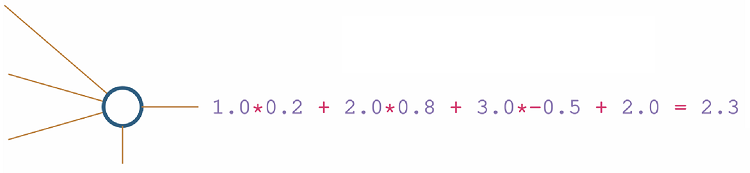

In [ ]:
# simple example of a single tranformation ("neuron")
inputs = [1, 2, 3] # X (e.g., pixels of an image)
weights = [0.2, 0.8, -0.5] # W
bias = 2

# y = X*W + b
# matrix multiplication expanded
output = (inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias)
print(output) # [2.3]

The "neuron/neuronal network" is a methaphor which hinders essential understanding of the basic underlying principles and understanding of more complex NN architectures like CNNs, RNNs and Transformers.

Matimatically, <font color='red'>**NNs are a sequence of linear transformations** which are applied to the input, e.g. a matrix of pixels in a image classification task. A NN can be viewed as a **composition of functions**</font>.

The most important equation to understand neueral networks is $y = x*w + b$. The <font color='red'> output is *y*, the input feature is denoted by *x*, trainable parameters are *w* (weight) and *b* (bias)</font>.

This function is linear, however, if we aply a **non-linear function** to y, it's output, we can predict non-linear outputs (i.e., classes in a classification problem), e.g. *sigmoid*(*y*), *relu*(*y*), *tanh*(*relu*) etc.

If we would take out **activation functions** out of NNs they would predict only linear outputs no matter how many layers (i.e. transformations) you would stock on top of each other.

**From single "neurons" to vectors and matrices**

In NNs, we are dealing not with a scalar input *x*, but rather **vectors** (or even **matrices** like in CNNs). That is, *x* (single number) is rather **X** (sequence of numbers). Consequently, *w* is also a vector.

Number of elements in **X** (feautures/"neurons") has to match number of parameters (connection weights) in **W**. *b* is still a scalar in that scenario.

At this point, we still have a single equation y = X\*W + b which now operates with vectors. However, in a network you normally define multiple equations (hidden units/"neurons") such that **W** becomes a matrix of weights with the dimension num_parameters*num_of_operations/neurons.

Now, *b* has to become a vector matching the number of operations since it still has to be added in each multiplication. The output *y* will also become a vector of outputs.

**Feed-forward NNs as combination of linear trasformations and activation functions**

In essence, <font color='red'>simple feed-forward NNs are a series of matrix multiplications</font>. Additionally, to be able to output highly non-linear functions, a <font color='red'>non-linear activation function is applied to each element of Y</font>.

After that, <font color='red'>outputs Y serve os inputs to the next layer of a network</font> (matrix multiplication). When building own network, <font color='red'>you can choose paramets such as number of layers, number of units/"neurons" in each layer, specific activation functions</font> yourself. 

Those are also <font color='red'>called **hyperparameters** which are not adjusted by the network itself</font> but rather are decided upon experimentation/<font color='red'>tuning on the validation data set</font> (i.e., just take those with which your network achieves best training/generalization classification accuracy).

The input features **X** are also fixed and are determined by the training data. To make the function of a NN map from an specific input to a desired output, the network can only change its **W** (weights) and *b* (biases). Those are "trainable" parameters.

A single network can have thousands and even millions and billions of parameters.

**Constructing dense layers**

The operation described above can be viewed as a single "neuron". When we add two additional linear operations, we get a "layer of neurons".

In [ ]:
# example of three transformations applied to the input (3 "neurons")
inputs = [1, 2, 3, 2.5] # now we have 4 input features
# that means that we need 4 parameter weights within each transformation ("neuron")
# we now also define 3 transpormations ("neurons") - the number of 3 is freely up to our choice
weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]
# now, we also need three bias values, onne for each transformation ("neuron")
bias1 = 2
bias2 = 3
bias3 = 0.5

outputs = [         
           # transformation/"neuron" 1:
           inputs[0]*weights1[0] +
           inputs[1]*weights1[1] +
           inputs[2]*weights1[2] +
           inputs[3]*weights1[3] + bias1,
           
           # transformation/"neuron" 2:
           inputs[0]*weights2[0] +
           inputs[1]*weights2[1] +
           inputs[2]*weights2[2] +
           inputs[3]*weights2[3] + bias2,
           
           # transformation/"neuron" 3:
           inputs[0]*weights3[0] +
           inputs[1]*weights3[1] +
           inputs[2]*weights3[2] +
           inputs[3]*weights3[3] + bias3]

print(output) # [4.8, 1.21, 2.385]

We take the input features (e.g., pixels of an image) and apply the equation y = x*w + b three times.

Each time the values of *w* and *b* are different, so that in the end we get three different values for *y*. You can try to understand it using the "neuron"-based visualization which is the preferred way in online courses and beginner texts:

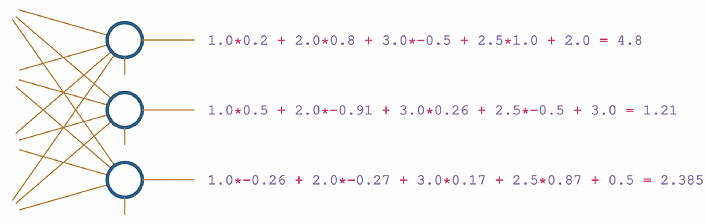

**Neuron metaphor vs matrix multiplication**

However, this becomes cumbersome very fast when you are dealing with realistic (wider and deeper) NNs architectures. Also, for instance, CNNs don't use matrix multiplication as their underlying mathematical function such that the fancy "neuron" analogy breaks down very fast when trying to go beyod shallow understanding and leaves you rather confused when you try to picture a CNN as a network of interconnected circles.

Additionally, all deep learning libraries don't multiply input parameters with weights one by one but just implement *matrix multiplications* (or *convolutions* in CNNs) so getting rid of the "neuron" metaphor will also help you with implementing NNs with modern software.

But the metaphor explains why people talk about "fully connected layers" and number of "neurons". Historically, the reason for this was probably just to get research funding since people were not just doing matrix multiplications, but "simulated neurons".

*Another advice for easing the learning process:* when beginner courses first try to implement NNs structure as loops, just skip those chapters. This is just waste of time and energy.

Instead, try to understand that you have performed dot-product operations when dealing with input paramets and weights:

In [ ]:
import numpy as np

# rewriting a single transformation ("neuron") as dot-product
# both inputs and weights are lists (vectors)
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

outputs = np.dot(weights,  inputs) + bias
print(outputs) #4.8

# rewriting three transformations ("neurons") as dot-products
# weights are now a list of three lists (vectors), so a matrix
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

# there is a single bias for each transformation
biases = [2.0, 3.0, 0.5]

layer_outputs = np.dot(weights,  inputs) + biases
print(layer_outputs) # array([4.8     1.21    2.385])

4.8
[4.8   1.21  2.385]


**Training batches**

When training a NN, normally several data points (e.g., images) are passed at once (in a *batch*) to the network function. That means that the inputs are not single vectors, but also rather a **list of vectors** (a matrix).

The reason why we pass examples in a batch is because we apply stochastic gradient descend to omptimize network's performance. More details on this point later.

So, in practice we end up performing a matrix multiplication since inputs and weights are now both matrices.

In [ ]:
import numpy as np

# example of matrix multiplication a batch of inputs
inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2.0, 3.0, 0.5]

# you have to transpose the weight matrix in order to get the
# matrix multiplication to work (see figure below)
layer_outputs = np.dot(inputs, np.array(weights).T) + biases
print(layer_outputs)

#array([[ 4.8  [ 8.9    [ 1.41  1.21 -1.81  2.385],  0.2  ],  1.051  0.026]])

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]
[[ 0.2   0.5  -0.26]
 [ 0.8  -0.91 -0.27]
 [-0.5   0.26  0.17]
 [ 1.   -0.5   0.87]]


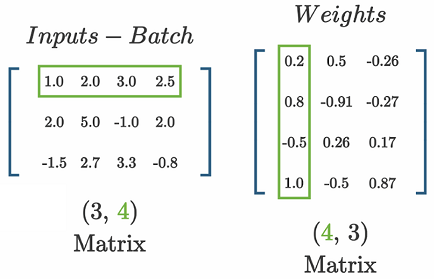

For background on matrices and linear algebra see 3Blue1Brown's playlist on "Essence of Linear Algebra" https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab

Now, we can stuck several layers on top of each other or, in other words, chain a sequence of linear transformations.

In [ ]:
import numpy as np

# adding a second layer of transformations
inputs = [[1, 2, 3, 2.5], [2., 5., -1., 2], [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

**Activation functions**

The result of each linear transformation has first to pass through a non-linear activation function before it reaches the next layer.

A network consists of at least 3 layers, where we define an **input layer** (for passing training data to the network), an **output layer** (outputting the class of a single training data point) and all layers inbetween are called "hidden" layers.

**Hidden layers** (i.e, intermediate layers) are connected with binary **activation functions** (*sigmoid*, *relu*, *tanh*) to simulate a choice between active vs non-active for euch "neuron".

**Sigmoid:**

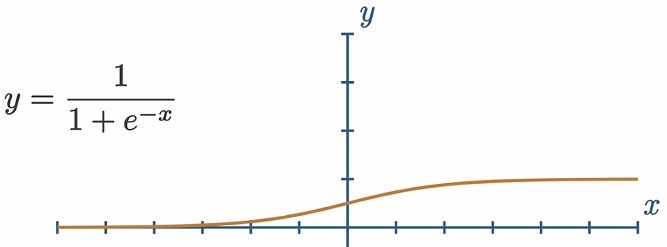

If *x* is less than zero and approches negative infinity, output is between zero and 0.5. If *x* is bigger than zero and approaches positive infinity, output is between 0.5 and 1.

Tanh's curve is similar to sigmoid but the output is in the range of -1 and 1.

**ReLU (Rectified linear unit):**

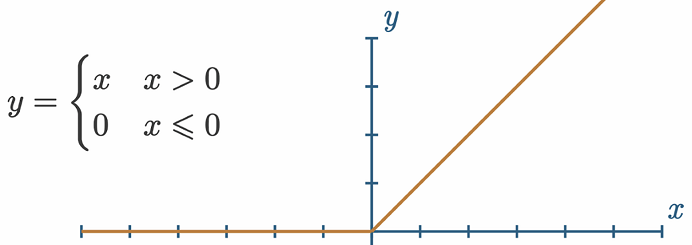

If *x* is less or equal to zero - the output is zero. Otherwise the output is *x*. This function is computationally very efficient.

In [ ]:
# relu functions as plain Python code
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []
for i in inputs:
  output.append(max(0, i))

print(output)

# or with numpy
import numpy as np
output_np = np.maximum(0, inputs)
print(output_np)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]
[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


**Softmax function**

In the last layer (output layer), most notably **sofmax activation** function is used which allows to perform *multi-class classification*.

Softmax returns a vector with the length corresponding to the number of classes you want to predict. You can interpret the confidence scores returned by the softmax as probabilities since summing all of them will result in 1.

So, when predicting 3 classes, a valid output of softmax could be [0.3 0.6 0.1]. In this example, the network would be about 60% confident that the training data point belongs to the second class.

Here is the formula of the softmax function:

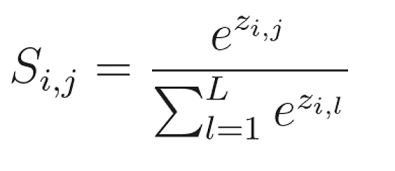

**Normalizing confidence scores**

Given an example output of layer_output = [4.8, 1.21, 2.385], how do we derive at the normalised confidence scores?

First, network outputs are exponentiated using the Euler's number (constant *e* = 2.718): y = e**x.

By appling exponentiation to each score, we get rid of negative values. For negative values, exponentiation returns zero, 1 for zero values, and increases for positive values:

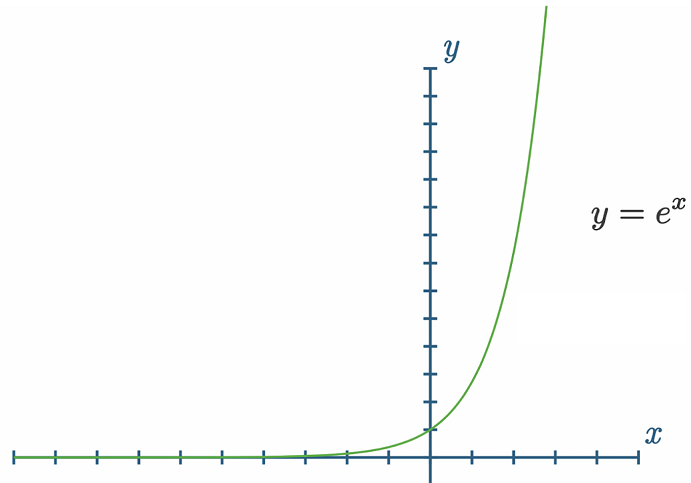

The exponential function is monotonic, which means that with higher inputs, outputs will also become higher, but it's impossible to change the confidence across predicted classes: relative differences remain intact.

Secondly, we want to convert the exponentiated score into a probability distribution such that scores add to 1. This is done by normalizing each score by dividing by the sum of all confidence scores.

In [ ]:
layer_outputs = [4.8, 1.21, 2.385]

# 1. step - exponantiation
E = 2.71828182846   #  you  can  also  use  math.e

#  for  each  value  in  a  vector,  calculate  the  exponential value
exp_values = []
for output in layer_outputs:
  exp_values.append(E ** output)   #  **  -  power  operator  in  Python

print('exponentiated  values:')
print(exp_values)

# 2. step - normalizing
norm_base = sum(exp_values)

#  We  sum  all  values
norm_values = []
for value in exp_values:
  norm_values.append(value / norm_base)

print('Normalized  exponentiated  values:')
print(norm_values)

print('Sum  of  normalized  values:', sum(norm_values))

# implementation with numpy
import numpy as np

#  for  each  value  in  a  vector,  calculate  its  exponential  value
exp_values = np.exp(layer_outputs)
print('exponentiated  values:')
print(exp_values)

# normalize  values
norm_values = exp_values / np.sum(exp_values)
print('normalized  exponentiated  values:')
print(norm_values)
print('sum  of  normalized  values:',  np.sum(norm_values))

exponentiated  values:
[121.51041751893969, 3.3534846525504487, 10.85906266492961]
Normalized  exponentiated  values:
[0.8952826639573506, 0.024708306782070668, 0.08000902926057876]
Sum  of  normalized  values: 1.0
exponentiated  values:
[121.51041752   3.35348465  10.85906266]
normalized  exponentiated  values:
[0.89528266 0.02470831 0.08000903]
sum  of  normalized  values: 0.9999999999999999


Additionally, to make the computation of softmax more robust (guarding against overflow errors), we might subtract the max output value from each element of the output vector before applying exponentiation:

In [ ]:
exp_values = np.exp(layer_outputs - np.max(layer_outputs))
print(exp_values)

[1.         0.02759833 0.08936734]


# Transformation flow through the network: Forward pass

Let's formulate a Python class of a network layer which can be instantiated with specific number of dimensions (inputs, weights). And then let's define how inputs will flow through the network using linear transformations and 
activation functions. 

In [ ]:
import numpy as np

# a class allows to instantiate a layer of arbitrary dimensions
# a fully-connected layer (FC)
class Layer_Dense:

  # class constructor method
  def __init__(self, n_inputs, n_neurons):
    # np.random.rand outputs a random number from the Gaussian (normal) distribution
    # all numbers are kept small by using a constant factor of 0.01
    # that helps with controlling gradients, keep training more robust
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    # generating a row vector of zeros with the length of outputs number
    self.biases = np.zeros((1, n_neurons))
  
  # forward pass method
  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases
  
# ReLU activation
class Activation_ReLU:     
  # forward pass
  def forward(self, inputs):
    # calculate output values from inputs
    self.output = np.maximum(0, inputs)

# softmax activation
class Activation_Softmax:
  # forward pass
  def forward(self, inputs):
    # get unnormalized probabilities
    # since were are operating over a batch of training data points,
    # we have to define over which dimension of the input matrix we
    #want to compute the max value
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    # normalize them for each sample
    # again, we have to define across which dimension the scores are computed
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities

**Initialization of weights**

Usually, weights are randomly initialized, but never to zero. Initializing them to same values across different "neurons" will result in symmetry within the network (different neuron learning identical functions), and initializing them to zero will result in "dead neurons" for which no gradients can be computed.

Those points will be explained later. Biases can be initialized to zeros. However, it's also possible to preload weights from a different NN model so you don't have to train them in case you are working on identical classification problem or you are able to fine-tune them to your specific data set/task.

Due to defining the dimensions for weights as (inputs, outputs/neurons) there is no mathematical need to transpose the weights matrix.

Now, let's create some synthetic data to pass it through our simple NN.

In [ ]:
# package for creating synthetic data
%pip install nnfs

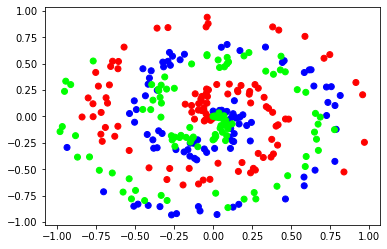

(300, 2)


In [ ]:
# create synthetic dataset
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# create dataset of 300 training samples overall
X, y = spiral_data(samples=100, classes=3)
# X contains 100 data poits each characterized by a pair of numbers between -1 and 1
# y contains class of each of the 100 data points (0, 1, 2)

# visualize it
import matplotlib.pyplot as plt
# y (class) is mapped to color attribute (0 = blue, 1 = red, 2 = green)
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()


In [ ]:
# create dense layer with 2 input features (pair of numbers between -1 and 1)
# and 3 output values (three transformations/"neurons")
dense1 = Layer_Dense(2, 3)

# Create ReLU activation for the first layer:
activation1 = Activation_ReLU()

# create second dense layer with 3 input features (as we take output number of
# the previous layer)
# and 3 output values (output layer)
dense2 = Layer_Dense(3, 3)

# create Softmax activation for the output layer:
activation2 = Activation_Softmax()

# perform a forward pass of our training data through this layer
# for each of the 300 data points a vector with three outputs is calculated
# resulting in a matrix of the dimension 300*3 after first layer
dense1.forward(X)
# ReLU activation function is applied
activation1.forward(dense1.output)
# 300*3 is passed into the second layer and a matrix of 300*3 is output
dense2.forward(activation1.output)
# finally, softmax is applied
activation2.forward(dense2.output)

# this is the final network output
print(activation2.output[:5])
# the network is making a random prediction as its confidence is about
# 33% for each class for every training data point


[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]


300

**How to quantify network's error: Loss function**

When we are able to quantify how the predicted scores are different from the true scores, we can calculate how we can adapt weights and biases of the network to improve its prediction accuracy.

To do this, we define the **loss function** (also called cost function). The overall goal is to reduce the loss as much as possible. In other words, in an optimal case we would approach a loss of zero.

**Cross-entropy function**

To compute loss in the classification setting, the output of the sofmax function (network's classification prediction) is compared to true probability distribution for a specific training example.

For instance, when an training example belongs to the third class which is defined as [0, 0, 1]. The network might predict for this examample [0.7, 0.1, 0.2]. So, the goal is to push down the confidence score down for the first and third class and push it up for the second class.

It's possible to compare both vectors ([0, 0, 1] vs [0.7, 0.1, 0.2]) as two probability distributions. This is done by applying categorical cross-entropy loss function using following formula:

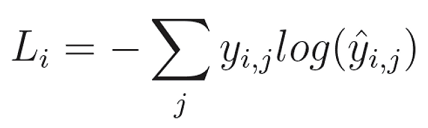

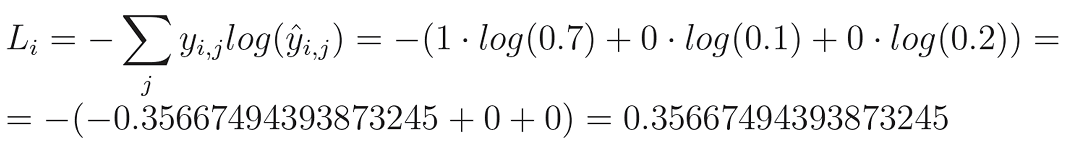

As we see, all terms corresponding to wrong classes are zeroed out which leaves us with negative log of the prediction confidence of the "true" (desired) class.

So, the cross-entropy formula simplifies in the classification case to:

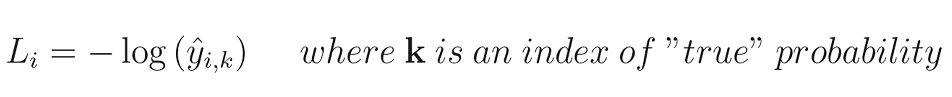

Where *L​i*​ denotes sample loss value, *i*​ is the i-th sample in a set/batch, *k*​ is the index of the target label (expected/desired class), *y*​ denotes the target (expected/desired) values and *y-hat*​ denotes te values predicted by the network.

The loss is bigger the bigger the difference between desired and actually predicted outputs is.

You find more details here https://machinelearningmastery.com/cross-entropy-for-machine-learning/

In [ ]:
# python implementation
import math

# network's output
softmax_output = [0.7, 0.1, 0.2]
# expected classes
target_output = [1, 0, 0]

loss = -(math.log(softmax_output[0])*target_output[0] +
         math.log(softmax_output[1])*target_output[1] +
         math.log(softmax_output[2])*target_output[2])

print(loss) 

# simplified
simp_loss = -math.log(softmax_output[0])

print(simp_loss) 

0.35667494393873245
0.35667494393873245


In the previous example, the index of the expected class (the first) was hard-coded. When training a network, we have to know at which index of the softmax output vector the target class is expected.

That means, we need to have a vector *y* (see X, y = spiral_data(samples=100, classes=3)) which will contain a list of class values for all training examples.

Also, we have to compute loss for a batch of training examples. In that case we compute an average loss across all training examples contained in the batch.

In [ ]:
# assume that we have softmax output from 3 training examples
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])

# and 3 corresponding class values
class_targets = [0, 1, 1]

# we can get the confidence scores for each example at the index of the corresponding target label
# we are filtering the softmax array by index values (which correspond to classes)
print(softmax_outputs[range(len(softmax_outputs)), class_targets])

# that means that the model is 70% confident about the first training example
# belonging to the expected class
# 50% confident about the second training example belonging to the expected class
# and 90% confident about the third example belonging to the expected class

# to compute loss, we can apply negative log to these confidence scores
print(-np.log(softmax_outputs[range(len(softmax_outputs)), class_targets]))

# finally we compute an average across all 3 training examples
neg_log = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets])
average_loss = np.mean(neg_log)
print(average_loss)

# in the end, we get a single scalar - loss - which represets network's overall error
# we want this number to be zero in an ideal case

[0.7 0.5 0.9]
[0.35667494 0.69314718 0.10536052]
0.38506088005216804


**Performance metrics**

Besides loss, we also monitor **prediction accuracy** of the network during it's training to assess how the model improves over time. To compute accuracy we can reuse calculations made for the cross-entropy loss.

In [ ]:
# accuracy computation
import numpy as np

# confidence scores  for  3 training samples
softmax_outputs = np.array([[0.7, 0.2, 0.1], [0.5, 0.1, 0.4], [0.02, 0.9, 0.08]])

# expected (ground-truth)  labels  for  same 3 training samples
class_targets = np.array([0, 1, 1])

# Calculate  values  along  second  axis  (axis  of  index  1)
predictions = np.argmax(softmax_outputs, axis=1)

# target labels can come as a list (see above) or can be encoded with one-hot
# vector (e.g., class 3 can be also represented as [0, 0, 1]). To make sure the
# labels come in the form of list, this
# If  targets  are  one-hot  encoded  -  convert  them to list
#if len(class_targets.shape) == 2:
#  class_targets = np.argmax(class_targets, axis=1)
  
#  True  evaluates  to  1;  False  to  0
accuracy = np.mean(predictions==class_targets)

print('acc:',  accuracy)

acc: 0.6666666666666666


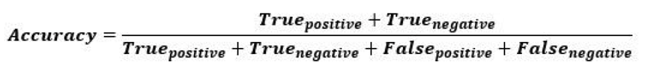

Apart from accuracy which is defined as the percentage of all correctly classified examples, there are also metrics of precision and recall.

**Precision** is the percentage of correctly classified positive examples. When the number of incorrectly classified positives (false positives) goes up, this percentage goes down.

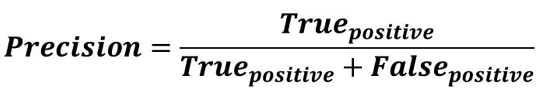

**Recall** is the percentage of correctly classified positive examples in relation to the number of examples incorrectly classified as negatives. That means that recall goes down if the number of false negatives goes up.

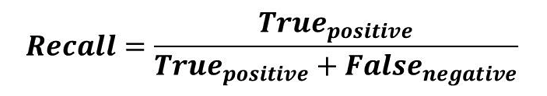

The **F1 score** is the harmonic mean of the precision and recall and is calculated as follows:

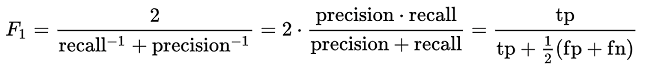

For more background on accuracy and recall see https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/ 

For more Python code see https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/

Finally, we can combine the forward pass code of our network with the loss and accuracy calculations.

In [ ]:
import numpy as np

class Layer_Dense:

  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))
  
  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases
  
class Activation_ReLU:     
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities

# Common loss class (super class)
class Loss:
  def calculate(self, output,y):
    # Calculate sample losses
    sample_losses = self.forward(output, y)
    # Calculate mean loss
    data_loss = np.mean(sample_losses)
    return data_loss

# cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
  def forward(self, y_pred, y_true):
    # number of samples in a batch
    samples = len(y_pred)
    # clip data to prevent division by 0: log(0) is mathematically not defined
    # clip both sides of prediction scores to not drag mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
    
    # I think it's superfluos: we know that our data has a list of class labels
    # confidence scores for target values -
    # only if categorical labels
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[range(samples), y_true]
    # Mask values - only for one-hot encoded labels
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
    
    # Losses
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

# create network structure (computational graph)
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy() 

# perform a forward pass 
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

#  predictions for the first 5 training examples:
print(activation2.output[:5])
# calculate loss for all 100 samples
loss = loss_function.calculate(activation2.output,  y)
print('loss:',  loss)

# we keep the class index with the highest model prediction
predictions = np.argmax(activation2.output, axis=1)

# this check is against one-hot encoding of target labels and is superfluos
if len(y.shape) == 2:
  y = np.argmax(y, axis=1)

# predictions==y will return an array of True and False
# np.mean will count all numbers of True and devide it by the length of the
# whole vector 
accuracy = np.mean(predictions==y)
print('acc:', accuracy)


[[0.33333334 0.33333334 0.33333334]
 [0.33333355 0.33333308 0.33333334]
 [0.33333397 0.33333275 0.33333328]
 [0.33333462 0.33333248 0.3333329 ]
 [0.33333504 0.33333218 0.33333275]]
loss: 1.0986098
acc: 0.35


# Optimization flow through the network: Backward propagation

The forward pass through the network is a chain of functions. We are passing in training samples, the data flows through all of the layers, and activation functions to form its output which is passed to the loss function:

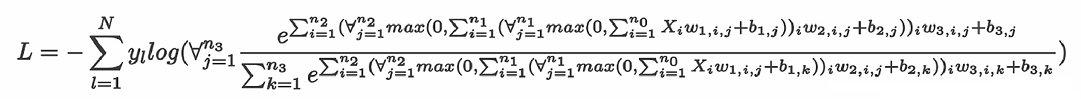

The loss function is a chain of functions, of multiple inputs — input data, weights, and biases. The model output, along with the targets, is passed to the loss function, which returns the model’s error. We can look at the loss function that takes targets, samples, and all of the weights and biases as inputs if we chain all of the functions performed during the forward pass.

Each weight and bias has a different degree of influence on the netwrok's loss, and this function is by design highly non-linear. Additionally, this functio n is different for each training sample. Decreasing network's loss over time is the process of "learning".

We need to formulate a mechanism (algorithm) which allows to adjust weights and biases of the network with the goal to decrease its loss. This is achieveable with backpropagation during which each weight is ajdusted by using gradients and the chain rule.

**The gradient**

The gradient is a vector composed of all of the partial derivatives of a function, calculated with respect to each input variable (weights and biases). Here is an example of a gradient:

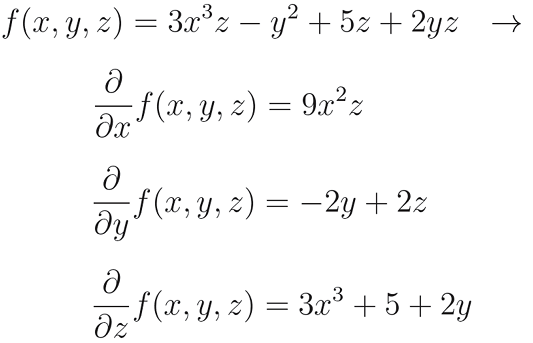

For single-parameter functions (e.g. activation functions) we will compute derivatives and gradients for multi-variate functions to perform gradient descent, or the backward pass through the network.

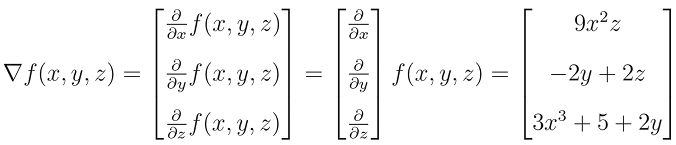

Understanding gradients and the chain rule

To understand gradients and the chain rule in more detail, it might be helpful to recall basics of derivates and partial derivates.

When we define a simple linear function like f(x) = 2x, we can formulate how much "impact" x has on y. We can understand it as the slope of a fuction: dy/dx. In other words, the change in y divided by the change in x.

To compule the slope of a fuction we need to take two points lying on the function's graph, subtract their y and x dimensions, and devide them.

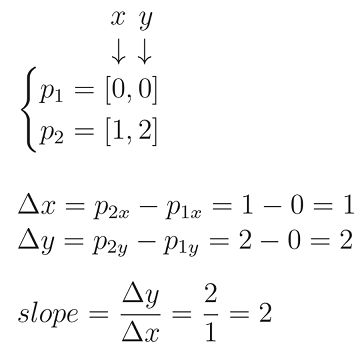

We could say the measure of the impact that *x* has on *y*​ is 2 for the function *f(x) = 2x*.

[0 1 2 3 4]
[0 2 4 6 8]


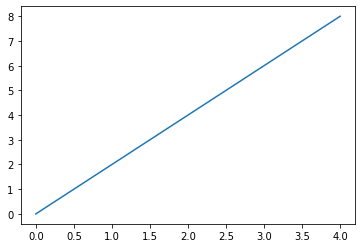

Slope: 2.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def f(x):
  return 2*x

x = np.array(range(5))
y = f(x)

print(x)
print(y)

plt.plot(x,y)
plt.show()

# slope
print(f'Slope: {(y[1]-y[0]) / (x[1]-x[0])}')

For non-linear functions, we can approximatits slope by calculating the slope of a tangent line at point x for a pecific output y. This is the derivative of the non-linear function.

The tangent line is created by drawing a line between two points that are “infinitely close” on a curve, but this curve has to be differentiable at the derivation point. This means that it has to be continuous and smooth. Then, because this is a curve, there is no single slope since its value depends on where we measure it.

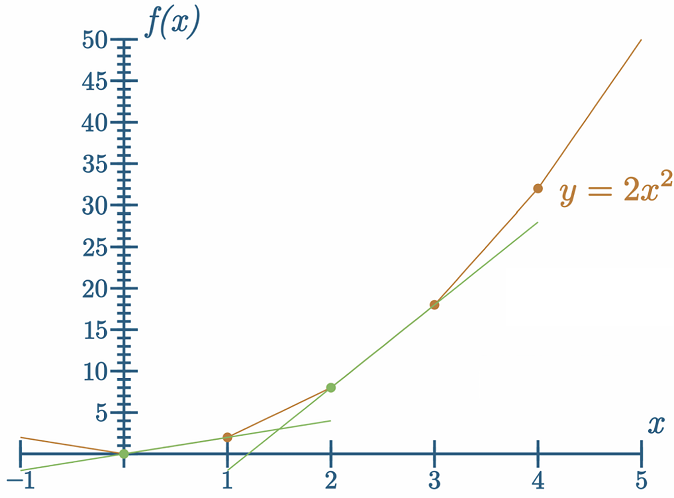

The above method offers an approximation of a derivative and is called numerical differentiation. However, this is not practical for the highly dimensional function influnced by many different parameters (i.e., weights and biases) of a neural network.

Instead, we are calculatingan analytical solution of a derivative, which also allows to break down network's complex function into simpler ones and to calculate partial derivatives combining them via the chain rule later.

See the derivative of a simple constant function below. The result of this function is a horizontal line as the output value for any x is 1. It is evident that the derivative equals 0 since there’s no change from one value of x to any other value of x.

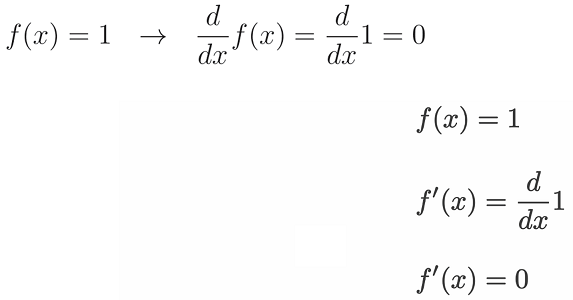

Here is the derivative of a linear function:

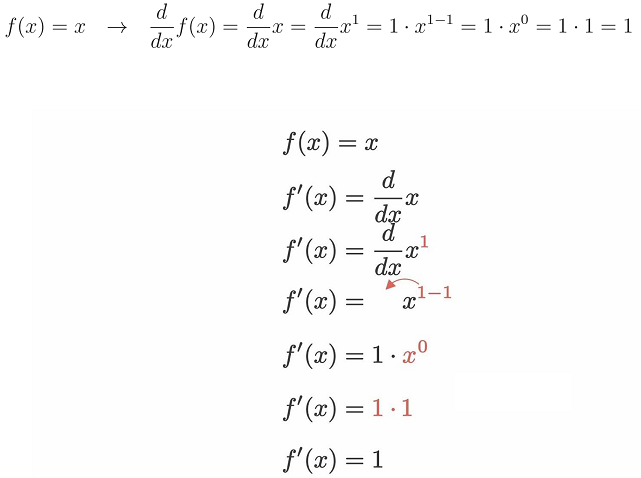

In this case, the derivative is 1, and the intuition behind this is that for every change of x, y changes by the same amount. Here is another example:

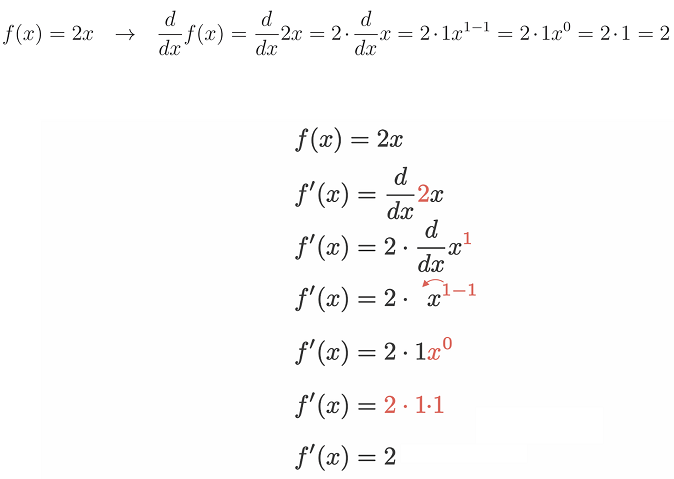

Now let's introduce exponents:

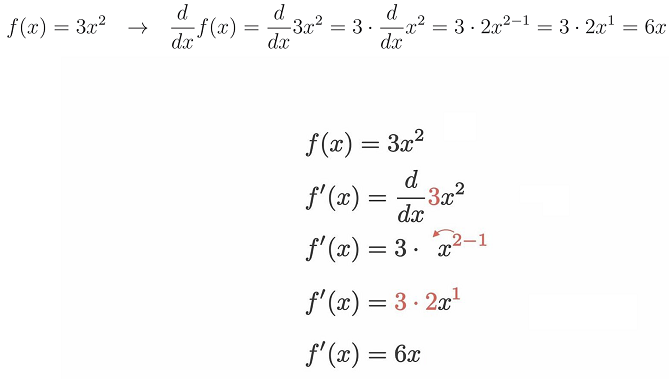

First, move the constant from the derivative. Then, move the exponent from the derivative and substract one from the exponent. Finally, simplify. ​ This means the slope of the tangent line, at any point, x​, for this quadratic function, will be 6x.

The derivative of a sum operation is the sum of derivatives, so we can split the derivative of a more complex sum operation into a sum of the derivatives of each term of the equation and solve the rest of the derivative using methods we already know.

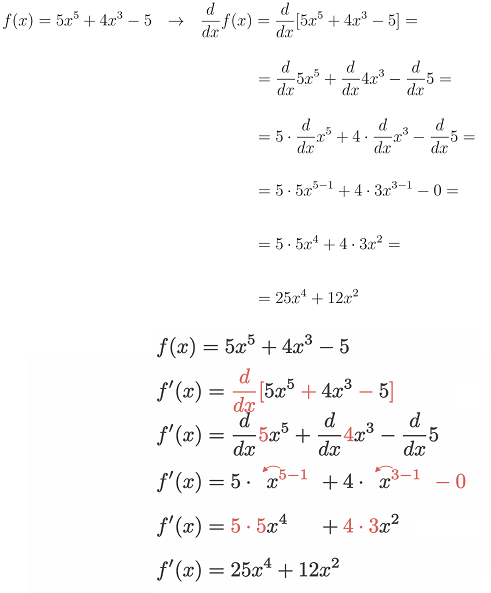

Remember, derivative of a constant is always zero. The derivative of x equals 1. Naturally, the derivate of a constant * x is equal ocnstant. The derivative of a linear function is its slope. Following are the rules neccessary do derive derivates (for most fuctions?).

**Derivation rules:**

The derivative of a constant multiple of the function equals the constant multiple of the function's derivative:

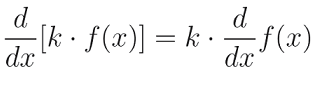

The derivative of a sum of functions equals the sum of their derivatives:

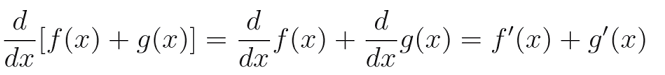

The same concept applies to subtraction:

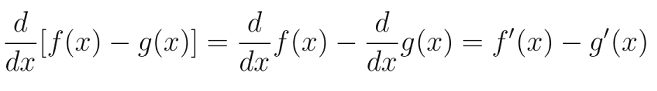

The derivative of an exponentiation:

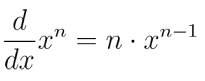

The derivatives solved so far has a single input x, however, in a network, each "neuron" has many inputs (weights and features multiplied and summed together). So there is need to calculate the derivative of each calculation performed during the forward pass.

The partial derivative calculates how much "impact" each input (parameter) has on a function's output. The full multivariate function’s derivative consists of a set of equations called the gradient. In other words, the gradient is a vector of the length of input parameters vector containing partial derivative solutions with respect to each of the inputs.

The gradient calculation in neural networks is simpler than what is required in physical systems since all inputs are always constant and cannot change (e.g., pixel values of an image).

Calculating the partial derivative with respect to a given input means to calculate it like the regular derivative of one input, just while treating other inputs as constants.

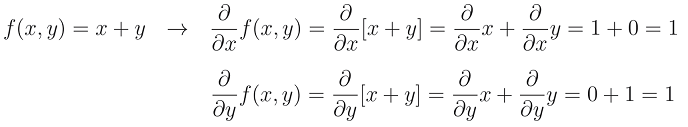

Here is an example which include multiplication and three variables:

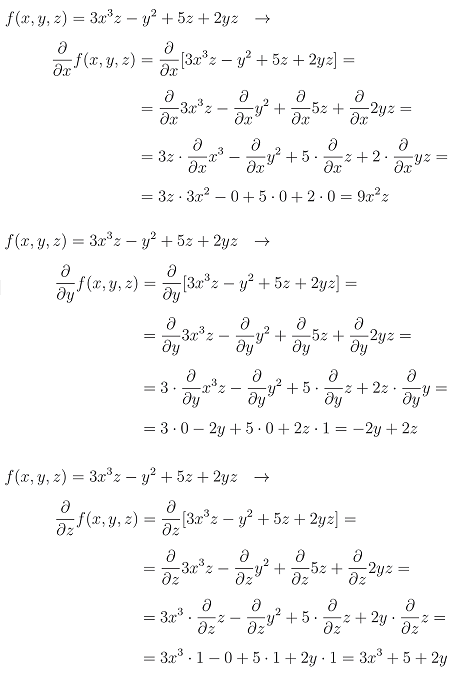

We need to derive derivatives for the other functions that we used in the forward pass, one of which is the derivative of the max()​ function.

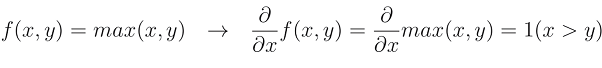

For the ReLU activation function, the derivative is 1​ when x​ is greater than 0, otherwise, it’s 0.

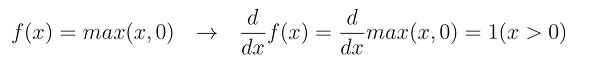

During the forward pass, we’re passing the data through the neurons, then through the activation function, then through the neurons in the next layer, then through another activation function, and so on. In other words, all functions are chained together: y = g(f(x)).

Since x is an input to the function f and then the output of the function f is an input to the function g, the output of the function g is influenced by x in some way, so there must exist a derivative which can inform us of this influence.

The chain rule tells us that the derivative of a function chain is a product of derivatives of all of the functions in this chain:

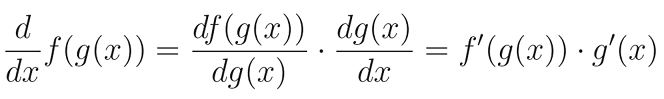

To calculate the partial derivative of a chain of functions with respect to some parameter, we take the partial derivative of the outer function with respect to the inner function in a chain to the parameter.

For more background on derivatives, chain rule and calculus see 2Blue1Brown's playlist on the "Essence of Calculus" https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr


**Gradient calculation for a single neuron**

Let's see how backpropagation works by focusing on a single "neuron" (matrix multiplication followed by an activation function).

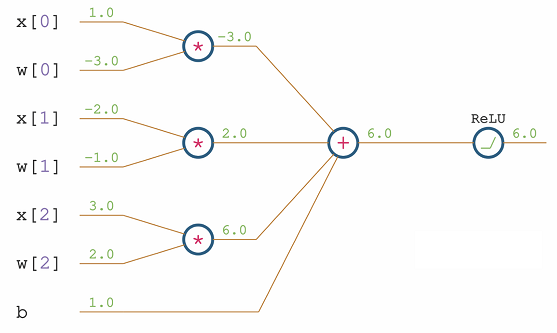

In [ ]:
#  Forward  pass
x = [1.0, -2.0, 3.0] #  input  values
w = [-3.0, -1.0, 2.0]   #  weights
b = 1.0   #  bias

#  Multiplying  inputs  by  weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]
print(xw0,  xw1,  xw2,  b)

#  Adding  weighted  inputs  and  a  bias
z = xw0 + xw1 + xw2 + b
print(z)

#  ReLU  activation  function
y = max(z, 0)
print(y)

-3.0 2.0 6.0 1.0
6.0
6.0


The forward pass can be formulated as a single equation:

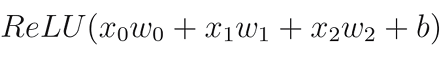

Which can be rewritten as:

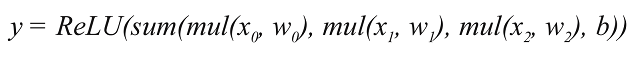

The above equation contains 3 nested functions: ReLU​, a sum of weighted inputs and a bias, and multiplications of the inputs and weights. To calculate the impact of the example weight, w​0​, on the output, the chain rule tells us to calculate the derivative of ReLU​ with respect to its parameter, which is the sum, then multiply it with the partial derivative of the sum operation with respect to its mul(x​0​, w​0​)​ input, as this input contains the parameter in question. Then, multiply this with the partial derivative of the multiplication operation with respect to the x​0​ input.

If we assume that the derivate from the next layer is 1, we now thet the derivative of the result of the activation function (6) is 1. Moving backwords through the network, we need to calculate partial derivatives for the sum of all weighted inputs (-3, 2, 6) and the bias (1). Then we need to combine those partial derivatives with the partial derivatives of the outer function (ReLU).

These are following results:

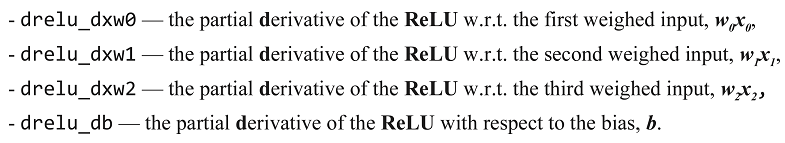

The partial derivative of the sum operation is always 1:

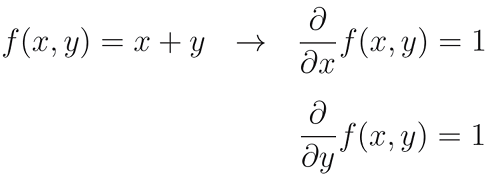

We have to calculate partial derivatives of the sum function with respect to all of the variables (weighted inputs, bias) and then multiply with partial derivative of the ReLU function. So, for the first variable:

dsum_dxw0 = 1

drelu_dxw0 = drelu_dz * dsum_dxw0

We have to repeat it for the other two inputs and the bias and end up with the following partial backpropagation graph:

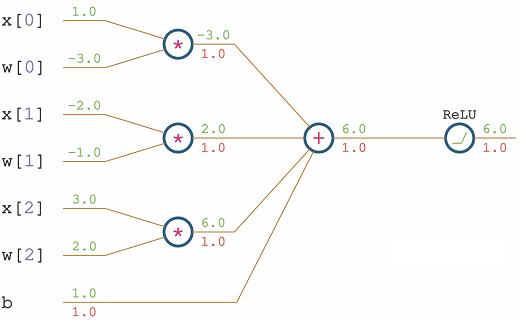

In [ ]:
#  Backward  pass

#  The  derivative  from  the  next  layer
dvalue = 1.0

#  Derivative  of  ReLU  and  the  chain  rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print(drelu_dz)

# Partial derivatives of the summation, the chain rule
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1
dsum_db = 1
drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_db = drelu_dz * dsum_db
print(drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db)

#  Partial  derivatives  of  the  multiplication,  the  chain  rule
dmul_dx0 = w[0]
dmul_dx1 = w[1]
dmul_dx2 = w[2]
dmul_dw0 = x[0]
dmul_dw1 = x[1]
dmul_dw2 = x[2]
drelu_dx0 = drelu_dxw0 * dmul_dx0
drelu_dw0 = drelu_dxw0 * dmul_dw0
drelu_dx1 = drelu_dxw1 * dmul_dx1
drelu_dw1 = drelu_dxw1 * dmul_dw1
drelu_dx2 = drelu_dxw2 * dmul_dx2
drelu_dw2 = drelu_dxw2 * dmul_dw2
print(drelu_dx0,  drelu_dw0,  drelu_dx1,  drelu_dw1,  drelu_dx2,  drelu_dw2)

1.0
1.0 1.0 1.0 1.0
-3.0 1.0 -1.0 -2.0 2.0 3.0



Finally, the same operation is performed for inputs and weights, which give us the complete backpropagation graph:

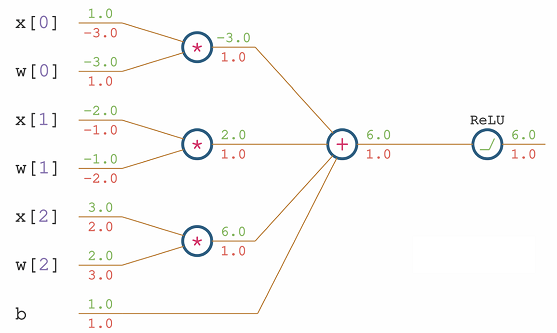

Here is the simplification of the chain rule for the partial derivative of ReLU wrt the first input x[0].

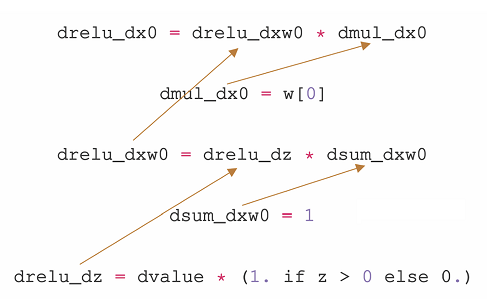

In [ ]:
# simplification of the partial derivative computation of ReLU for the first input point x[0]

# combine
# drelu_dx0 = drelu_dxw0 * dmul_dx0
# dmul_dx0 = w[0]
# to
drelu_dx0 = drelu_dxw0 * w[0]

# combine 
# drelu_dxw0 = drelu_dz * dsum_dxw0
# drelu_dx0 = drelu_dxw0 * w[0]
# to
drelu_dx0 = drelu_dz * dsum_dxw0 * w[0]

# combine
# dsum_dxw0 = 1
# drelu_dx0 = drelu_dz * dsum_dxw0 * w[0]
# to
drelu_dx0 = drelu_dz * 1 * w[0]
drelu_dx0 = drelu_dz * w[0]

# combine
# drelu_dz = dvalue * (1. if z > 0 else 0.)
# drelu_dx0 = drelu_dz * w[0]
# to
drelu_dx0 = dvalue * (1. if z > 0 else 0.) * w[0]


Combined into a vestor, all partial derivatives make up gradients.

dx = [drelu_dx0, drelu_dx1, drelu_dx2] # gradients on inputs

dw = [drelu_dw0, drelu_dw1, drelu_dw2]  # gradients on weights

db = drelu_db  # gradient on bias...just 1 bias here.

For the first layer gradients of the inputs isn't required. Using an optimizer we can apply a negative fraction of the gradient to the network weights. We apply a negative gradient since gradient shows the direction of the steepest ascent.

In a real network, the goal is not to decrease the output of the neutron but the loss of the network. Each neuron from the next layer will return a partial derivative of its function with respect to this input. The neuron in the current layer will receive a vector consisting of these derivatives. We need this to be a singular value for a singular neuron. To continue backpropagation, we need to sum this vector.

**Cross-entropy loss derivative**

p. 211

**Soft max derivative**

p. 216

In [ ]:
# package for creating synthetic data
%pip install nnfs

In [ ]:
# forward and backward passes combined
# and applied to simulated data

import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# Dense layer
class Layer_Dense:
  
  # Layer initialization
  def __init__(self, n_inputs, n_neurons):
    # Initialize weights and biases
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))
  
  # Forward pass
  def forward(self, inputs):
    # Remember input values
    self.inputs = inputs
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases
  
  # Backward pass
  def backward(self, dvalues):
    # Gradients on parameters
    self.dweights = np.dot(self.inputs.T, dvalues)
    self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
    # Gradient on values
    self.dinputs = np.dot(dvalues, self.weights.T)
  
# ReLU activation
class Activation_ReLU:
  
  # Forward pass
  def forward(self, inputs):
    # Remember input values
    self.inputs = inputs
    # Calculate output values from inputs
    self.output = np.maximum(0, inputs)
    
  # Backward pass
  def backward(self, dvalues):
    # Since we need to modify original variable,
    # let's make a copy of values first
    self.dinputs = dvalues.copy()
    # Zero gradient where input values were negative
    self.dinputs[self.inputs <= 0] = 0
      
# Softmax activation
class Activation_Softmax:
    
  # Forward pass
  def forward(self, inputs):
    # Remember input values
    self.inputs = inputs
    # Get unnormalized probabilities
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    # Normalize them for each sample
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities
    
  # Backward pass
  def backward(self, dvalues):
    # Create uninitialized array
    self.dinputs = np.empty_like(dvalues)
    # Enumerate outputs and gradients
    for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
      # Flatten output array
      single_output = single_output.reshape(-1, 1)
      # Calculate Jacobian matrix of the output and
      jacobian_matrix = np.diagflat(single_output) - \
                        np.dot(single_output, single_output.T)
      # Calculate sample-wise gradient
      # and add it to the array of sample gradients
      self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

# Common loss class
class Loss:
  # Calculates the data and regularization losses
  # given model output and ground truth values
  def calculate(self, output, y):
    # Calculate sample losses
    sample_losses = self.forward(output, y)
    # Calculate mean loss
    data_loss = np.mean(sample_losses)
    # Return loss
    return data_loss

# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
  # Forward pass
  def forward(self, y_pred, y_true):
    # Number of samples in a batch
    samples = len(y_pred)
    # Clip data to prevent division by 0
    # Clip both sides to not drag mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Probabilities for target values -
    # only if categorical labels
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[range(samples),y_true]

    # Mask values - only for one-hot encoded labels
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
    
    # Losses
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods
    
    # Backward pass
    def backward(self, dvalues, y_true):
      # Number of samples
      samples = len(dvalues)
      # Number of labels in every sample
      # We'll use the first sample to count them
      labels = len(dvalues[0])
      # If labels are sparse, turn them into one-hot vector
      if len(y_true.shape) == 1:
        y_true = np.eye(labels)[y_true]
        
      # Calculate gradients
      self.dinputs = -y_true / dvalues
      # Normalize gradient
      self.dinputs = self.dinputs / samples

# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():
  
  # Creates activation and loss function objects
  def __init__(self):
    self.activation = Activation_Softmax()
    self.loss = Loss_CategoricalCrossentropy()
  
  # Forward pass  
  def forward(self, inputs, y_true):
    # Output layer's activation function
    self.activation.forward(inputs)
    # Set the output
    self.output = self.activation.output
    
    # Calculate and return loss value
    return self.loss.calculate(self.output, y_true)
  
  # Backward pass
  def backward(self, dvalues, y_true):
    
    # Number of samples
    samples = len(dvalues)
    
    # If labels are one-hot encoded,
    # turn them into discrete values
    if len(y_true.shape) == 2:
      y_true = np.argmax(y_true, axis=1)
      
    # Copy so we can safely modify
    self.dinputs = dvalues.copy()
    # Calculate gradient
    self.dinputs[range(samples), y_true] -= 1
    # Normalize gradient
    self.dinputs = self.dinputs / samples
      
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output # of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function # takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer # takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output) 

# Perform a forward pass through the activation/loss function # takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y)

# Let's see output of the first few samples:
print(loss_activation.output[:5])
# Print loss value
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets # calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
  y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)

# Print accuracy
print('acc:', accuracy)

# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

# Print gradients
print(dense1.dweights)
print(dense1.dbiases)
print(dense2.dweights)
print(dense2.dbiases)

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]
loss: 1.0986104
acc: 0.34
[[ 1.5766357e-04  7.8368583e-05  4.7324400e-05]
 [ 1.8161038e-04  1.1045573e-05 -3.3096312e-05]]
[[-3.60553473e-04  9.66117223e-05 -1.03671395e-04]]
[[ 5.44109462e-05  1.07411419e-04 -1.61822361e-04]
 [-4.07913431e-05 -7.16780924e-05  1.12469446e-04]
 [-5.30112993e-05  8.58172934e-05 -3.28059905e-05]]
[[-1.0729185e-05 -9.4610732e-06  2.0027859e-05]]


**Improving gradient decent**

Gradients are subtracted from weights and biases iteratively during batch gradient decent, sometimes also called mini-batch gradient decent. In the case of neural networks, the gradient descent is performed on an n-dimensional function (our loss function), where n is the number parameters (weights and biases) that the model contains. Each pass through all training data is called an epoch.

During it's training a network may end up in a local minimum. As long as the loss value is not 0​ or very close to 0​, and the model stopped learning, we’re probably at some local minimum (either the reached point is too "deep" or a saddle point - "flat"). However, another reason for this may be insufficient amount of data.

momentum is able to deal with this issue as it adds "inertia" to the gradient decent. This is done by creating a rolling average of gradients over some number of update step and uses this average with the unique gradient at each step. In this way gradients are "dragged" into the direction of previous update steps.

Additionally, gradients are multiplied by the leraning rate and subtracted then from weights. With a learning rate 1, gradients are subtracted as a whole but the model may not converge since the raw changes are too unstable - gradients become larger and model loss becomes larger (gradient explosion).

We know that initial training benifits from a larger learning rate, but as the training progresses smaller gradient adjustments are required. To achive this learning dynamic we can apply the strategy of learning rate decay. Specifically, the training starts with a large learning rate which reduces, however, as the training continues and drops exponentialy during later epochs. This is done by multiplying each step number by the ratio t/1.

Here is a visualization of the gradient descent with a 1-dimensional function:

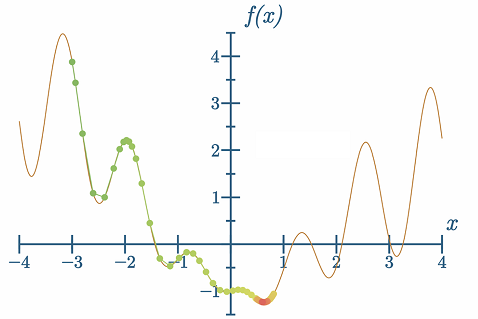

There are additional mechanisms which can improve the optimization process: AdaGrad (adaptive gradient) which employs a per-parameter learning rate rather than a single global learning rate. Furthermore, previous updates are kept and current gradients are normalized.

RMSProp (Root Mean Square Propagation) calculates an adaptive learning rate per parameter, but it’s calculated differently compared to AdaGrad. Adam (adaptive momentum) is build a top of RMSProp and adss momentum to the optimization process. Specifically, Adam adds manipulations of the gradients cache (gradients across several update steps).

To find best hyperparametrs (e.g., learning rate), we perform grid search by trying out different combinations of settings.

**Generalization and testing**

The complexity of neural networks is their biggest strength and problem. By having a massive amount of tunable parameters, they are exceptional at “fitting” to the training data. This is called "overfitting".

An overfit model will classify well training examples that it has already seen, but often significantly worse on unseen data (out-of-sample). However, the goal of neural networks, and any machine learning model, is generalization - high prediction accuracy on previously unseen examples. Here is a comparison of a classification boundary ofr a generalized (left) and an overfitted (right) model.

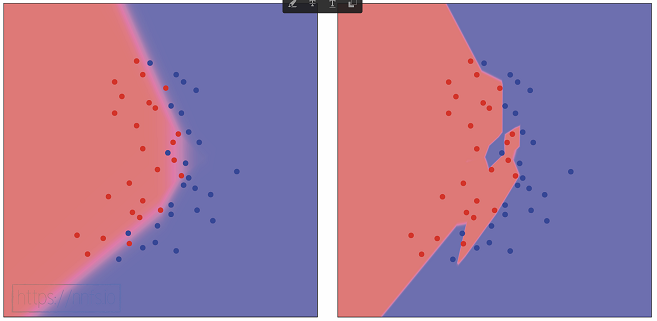

To have an insight into potential overfitting issues it's required to have a training and a test/evaluation data set. Training data should only be used to train a model. The testing, or out-of-sample data, should only be used to validate a model’s performance after training.

Having a very high accuracy on the training data, but significantly lower accuracy on the test data suggests model's overfitting. Ideally, both data sets should have the same accuracy prediction.

Several regularization techniques are used to prevent overfitting.

**Model bias and variance**

In other words we also say that an underitting model has a high bias. While an overfitting model is suffering from high variance. See the picture below:

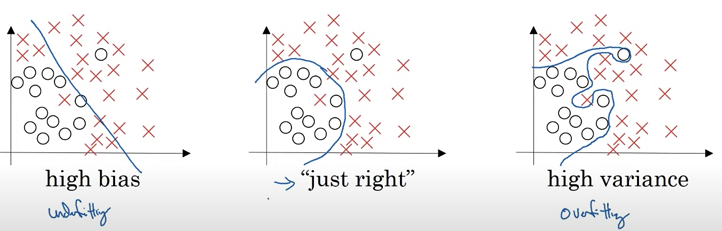

In low-dimensional data we can visualize the problem. However, this is not possible for high-dimensional data such that we have to look at different metrics like training set and test set error values (error = 1-accuracy).

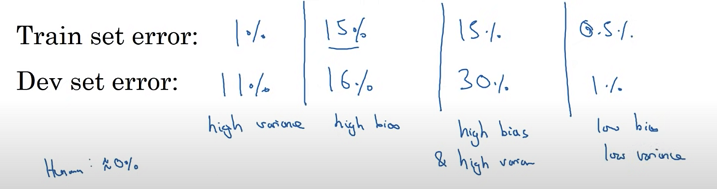

To determine whether the training error is a sign of high bias, we have to compare it to hypothetical optimal human performance error.

For more details see this video from the Deep Learning spacialization https://www.youtube.com/watch?v=1waHlpKiNyY&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc

**L1 and L2 Regularization**

To prevent overfitting, we calculate a penalty which is added to model's loss to penalize it for numerically big weights and biases.

For L1 regularization the sum of all absolute values of weights and biases is calculated and addad to model's loss. That is, L1 regularization is a linear penalty poportinal to all parameter values.

For L2 regularization, on the other hand, a sum of squared weights and biases is calculated. That is, this is a non-linear approach which penalizes larger weights and biases more stronger compared to numerically smaller parameters due to the square function.

Regularization functions of this type drive the sum of weights and the sum of parameters towards 0​, which can also help in cases of exploding gradients. Regularization is applied as part of the backpropagation chain.

Beyond this, we also want to dictate how much of an impact we want the regularization penalty to carry. We use a value referred to as lambda in this equation — where a higher value means a more significant penalty.

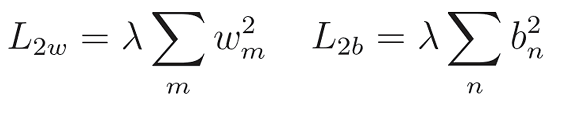

Regularization losses are calculated separately, then summed with the data loss, to form the overall loss (we can ignore L1).

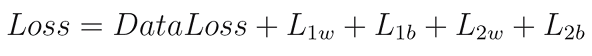

To implement regularization in the neural network code, we’ll start with the init method of the Dense layer’s class, which will house the lambda regularization strength hyperparameters, since these can be set separately for every layer.

Since penalty is summed with the data loss value, we need to add a new method to the general loss class, which is inherited by all of the specific loss functions.

To calculate the penalty, we’ll create the layer’s regularization loss variable. We’ll add to it each of the atomic regularization losses if its corresponding lambda value is greater than 0​. Finally, we add the regularization loss is added to our calculated loss in the training loop.

Additionally, we need to calculate partial derivatives for L2 regularization during the backward pass.

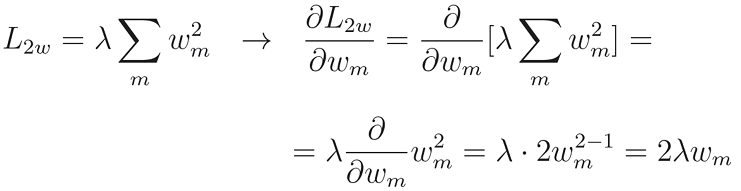

For L1 regularization see p. 338

**Dropout**

Main idea of dropout is to prevent a neural network from overfitting by becoming too dependent on any specific neuron/parameters.

Dropout works by randomly disabling neurons at a given rate during every forward pass. That means that only a part of all neurons “sees” the data and gets updates during a given pass.

For that, random numbers are drawn from the  Bernoullie distribution (0,1) which are multiplied with the layer we want to apply dropout to. In the case when inputs are multiplied by 0 this results in "dead" neurons for which no gradients can be calculated.

We have to add an additional hyperparameter of the percentage of neurons that should be disabeled for a specific layer. This is how it's implemented in TensorFlow/Keras. In PyTorch, 

In [ ]:
# package for creating synthetic data
%pip install nnfs

In [ ]:
# Adam optimizer added
# several training epochs defined for optimization
# regularization terms for L2 added
# dropout added

import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# Dense layer
class Layer_Dense:
  
  # Layer initialization
  def __init__(self, n_inputs, n_neurons,
                weight_regularizer_l2=0,
                bias_regularizer_l2=0):
    
    # Initialize weights and biases
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))
    
    # Set regularization strength
    self.weight_regularizer_l2 = weight_regularizer_l2
    self.bias_regularizer_l2 = bias_regularizer_l2
  
  # Forward pass
  def forward(self, inputs):
    # Remember input values
    self.inputs = inputs
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases
  
  # Backward pass
  def backward(self, dvalues):
    # Gradients on parameters
    self.dweights = np.dot(self.inputs.T, dvalues)
    self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

    # Gradients on regularization
    # L2 on weights
    if self.weight_regularizer_l2 > 0:
      self.dweights += 2 * self.weight_regularizer_l2 * self.weights
    
    # L2 on biases
    if self.bias_regularizer_l2 > 0:
      self.dbiases += 2 * self.bias_regularizer_l2 * self.biases

    # Gradient on values
    self.dinputs = np.dot(dvalues, self.weights.T)

# Dropout
class Layer_Dropout:
  
  # Init
  def __init__(self, rate):
    # Store rate, we invert it as for example for dropout
    # of 0.1 we need success rate of 0.9
    self.rate = 1 - rate
  
  # Forward pass
  def forward(self, inputs):
    # Save input values
    self.inputs = inputs
    # Generate and save scaled mask
    self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
    # Apply mask to output values
    self.output = inputs * self.binary_mask
  
  # Backward pass
  def backward(self, dvalues):
    # Gradient on values
    self.dinputs = dvalues * self.binary_mask

# ReLU activation
class Activation_ReLU:
  
  # Forward pass
  def forward(self, inputs):
    # Remember input values
    self.inputs = inputs
    # Calculate output values from inputs
    self.output = np.maximum(0, inputs)
    
  # Backward pass
  def backward(self, dvalues):
    # Since we need to modify original variable,
    # let's make a copy of values first
    self.dinputs = dvalues.copy()
    # Zero gradient where input values were negative
    self.dinputs[self.inputs <= 0] = 0
      
# Softmax activation
class Activation_Softmax:
    
  # Forward pass
  def forward(self, inputs):
    # Remember input values
    self.inputs = inputs
    # Get unnormalized probabilities
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    # Normalize them for each sample
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities
    
  # Backward pass
  def backward(self, dvalues):
    # Create uninitialized array
    self.dinputs = np.empty_like(dvalues)
    # Enumerate outputs and gradients
    for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
      # Flatten output array
      single_output = single_output.reshape(-1, 1)
      # Calculate Jacobian matrix of the output and
      jacobian_matrix = np.diagflat(single_output) - \
                        np.dot(single_output, single_output.T)
      # Calculate sample-wise gradient
      # and add it to the array of sample gradients
      self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

# Adam optimizer
class Optimizer_Adam:
  # Initialize optimizer - set settings
  def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                beta_1=0.9, beta_2=0.999):
    self.learning_rate = learning_rate
    self.current_learning_rate = learning_rate
    self.decay = decay
    self.iterations = 0
    self.epsilon = epsilon
    self.beta_1 = beta_1
    self.beta_2 = beta_2
  
  # Call once before any parameter updates
  def pre_update_params(self):
    if self.decay:
      self.current_learning_rate = self.learning_rate * \
          (1. / (1. + self.decay * self.iterations))
  
  # Update parameters
  def update_params(self, layer):
    
    # If layer does not contain cache arrays,
    # create them filled with zeros
    if not hasattr(layer, 'weight_cache'):
      layer.weight_momentums = np.zeros_like(layer.weights)
      layer.weight_cache = np.zeros_like(layer.weights)
      layer.bias_momentums = np.zeros_like(layer.biases)
      layer.bias_cache = np.zeros_like(layer.biases)
        
    # Update momentum  with current gradients
    layer.weight_momentums = self.beta_1 * \
                                layer.weight_momentums + \
                                (1 - self.beta_1) * layer.dweights
    layer.bias_momentums = self.beta_1 * \
                                layer.bias_momentums + \
                                (1 - self.beta_1) * layer.dbiases
    # Get corrected momentum
    # self.iteration is 0 at first pass
    # and we need to start with 1 here
    weight_momentums_corrected = layer.weight_momentums / \
        (1 - self.beta_1 ** (self.iterations + 1))
    bias_momentums_corrected = layer.bias_momentums / \
        (1 - self.beta_1 ** (self.iterations + 1))
      
    # Update cache with squared current gradients
    layer.weight_cache = self.beta_2 * layer.weight_cache + \
        (1 - self.beta_2) * layer.dweights**2
    layer.bias_cache = self.beta_2 * layer.bias_cache + \
        (1 - self.beta_2) * layer.dbiases**2
      
    # Get corrected cache
    weight_cache_corrected = layer.weight_cache / \
        (1 - self.beta_2 ** (self.iterations + 1))  
    bias_cache_corrected = layer.bias_cache / \
        (1 - self.beta_2 ** (self.iterations + 1))
      
    # Vanilla SGD parameter update + normalization
    # with square rooted cache
    layer.weights += -self.current_learning_rate * \
                      weight_momentums_corrected / \
                      (np.sqrt(weight_cache_corrected) + self.epsilon)
    layer.biases += -self.current_learning_rate * \
                    bias_momentums_corrected / \
                    (np.sqrt(bias_cache_corrected) + self.epsilon)
      
  # Call once after any parameter updates
  def post_update_params(self):
    self.iterations += 1

# Common loss class
class Loss:

   # Calculates the data and regularization losses 
   # Regularization loss calculation
   def regularization_loss(self, layer):
     # 0 by default
     regularization_loss = 0
     
     # L2 regularization - weights
     if layer.weight_regularizer_l2 > 0:
       regularization_loss += layer.weight_regularizer_l2 * \
                              np.sum(layer.weights * \
                              layer.weights)
     # L2 regularization - biases
     if layer.bias_regularizer_l2 > 0:
       regularization_loss += layer.bias_regularizer_l2 * \
                              np.sum(layer.biases * \
                              layer.biases)
     
     return regularization_loss
    
   # given model output and ground truth values
   def calculate(self, output, y):
     
     # Calculate sample losses
     sample_losses = self.forward(output, y)
     # Calculate mean loss
     data_loss = np.mean(sample_losses)
     
     # Return loss
     return data_loss

# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
  # Forward pass
  def forward(self, y_pred, y_true):
    # Number of samples in a batch
    samples = len(y_pred)
    # Clip data to prevent division by 0
    # Clip both sides to not drag mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Probabilities for target values -
    # only if categorical labels
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[range(samples),y_true]

    # Mask values - only for one-hot encoded labels
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
    
    # Losses
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods
    
    # Backward pass
    def backward(self, dvalues, y_true):
      # Number of samples
      samples = len(dvalues)
      # Number of labels in every sample
      # We'll use the first sample to count them
      labels = len(dvalues[0])
      # If labels are sparse, turn them into one-hot vector
      if len(y_true.shape) == 1:
        y_true = np.eye(labels)[y_true]
        
      # Calculate gradients
      self.dinputs = -y_true / dvalues
      # Normalize gradient
      self.dinputs = self.dinputs / samples

# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():
  
  # Creates activation and loss function objects
  def __init__(self):
    self.activation = Activation_Softmax()
    self.loss = Loss_CategoricalCrossentropy()
  
  # Forward pass  
  def forward(self, inputs, y_true):
    
    # Output layer's activation function
    self.activation.forward(inputs)
    # Set the output
    self.output = self.activation.output
    
    # Calculate and return loss value
    return self.loss.calculate(self.output, y_true)
  
  # Backward pass
  def backward(self, dvalues, y_true):
    
    # Number of samples
    samples = len(dvalues)
    
    # If labels are one-hot encoded,
    # turn them into discrete values
    if len(y_true.shape) == 2:
      y_true = np.argmax(y_true, axis=1)
      
    # Copy so we can safely modify
    self.dinputs = dvalues.copy()
    # Calculate gradient
    self.dinputs[range(samples), y_true] -= 1
    # Normalize gradient
    self.dinputs = self.dinputs / samples
      
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create dropout layer
dropout1 = Layer_Dropout(0.1) 

# Create second Dense layer with 3 input features (as we take output # of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_Adam(learning_rate=0.05, decay=5e-7)

# Train in loop
for epoch in range(10001):
  
  # Perform a forward pass of our training data through this layer
  dense1.forward(X)
  
  # Perform a forward pass through activation function
  # takes the output of first dense layer here
  activation1.forward(dense1.output)

  # Perform a forward pass through Dropout layer
  dropout1.forward(activation1.output)
  
  # Perform a forward pass through second Dense layer
  # takes outputs of activation function of first layer as inputs
  dense2.forward(dropout1.output)
  
  # Perform a forward pass through the activation/loss function
  # takes the output of second dense layer here and returns loss
  data_loss = loss_activation.forward(dense2.output, y)

  # Calculate regularization penalty
  regularization_loss = \
          loss_activation.loss.regularization_loss(dense1) + \
          loss_activation.loss.regularization_loss(dense2)
  
  # Calculate overall loss
  loss = data_loss + regularization_loss
  
  # Calculate accuracy from output of activation2 and targets
  # calculate values along first axis
  predictions = np.argmax(loss_activation.output, axis=1)
  
  if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
    
  accuracy = np.mean(predictions==y)
  
  if not epoch % 100:
    print(f'epoch: {epoch}, ' +
          f'acc: {accuracy:.3f}, ' +
          f'loss: {loss:.3f}, ' +
          f'data_loss: {data_loss:.3f}, ' +
          f'reg_loss: {regularization_loss:.3f}), ' + 
          f'lr: {optimizer.current_learning_rate}')
  
  # Backward pass
  loss_activation.backward(loss_activation.output, y)
  dense2.backward(loss_activation.dinputs)
  dropout1.backward(dense2.dinputs)
  activation1.backward(dropout1.dinputs) 
  dense1.backward(activation1.dinputs)
  
  # Update weights and biases
  optimizer.pre_update_params()
  optimizer.update_params(dense1)
  optimizer.update_params(dense2)
  optimizer.post_update_params()


epoch: 0, acc: 0.347, loss: 1.099, data_loss: 1.099, reg_loss: 0.000), lr: 0.05
epoch: 100, acc: 0.607, loss: 0.864, data_loss: 0.833, reg_loss: 0.031), lr: 0.04999752512250644
epoch: 200, acc: 0.623, loss: 0.800, data_loss: 0.760, reg_loss: 0.041), lr: 0.04999502549496326
epoch: 300, acc: 0.653, loss: 0.838, data_loss: 0.793, reg_loss: 0.044), lr: 0.049992526117345455
epoch: 400, acc: 0.650, loss: 0.776, data_loss: 0.728, reg_loss: 0.048), lr: 0.04999002698961558
epoch: 500, acc: 0.670, loss: 0.753, data_loss: 0.705, reg_loss: 0.048), lr: 0.049987528111736124
epoch: 600, acc: 0.697, loss: 0.743, data_loss: 0.693, reg_loss: 0.050), lr: 0.049985029483669646
epoch: 700, acc: 0.697, loss: 0.747, data_loss: 0.696, reg_loss: 0.051), lr: 0.049982531105378675
epoch: 800, acc: 0.693, loss: 0.738, data_loss: 0.688, reg_loss: 0.051), lr: 0.04998003297682575
epoch: 900, acc: 0.673, loss: 0.777, data_loss: 0.725, reg_loss: 0.051), lr: 0.049977535097973466
epoch: 1000, acc: 0.713, loss: 0.758, data

**Validation or development data**

Hyperparameter tuning should be done on a separate validation data set. This data set should be different from the data set on which the network is trained and different from the set on which network's performance is tested. It should contain out-of-sample data but we can be more liberal with its specific composition in contrast to the test data set.

The validation data set can come from the training data temporarily split during development in two parts. Another possibility is to use cross-validation during which the training data set is split into several parts, e.g., 5. Then we can train on 4 parts and validate on the remaining part. We can swap the subset on which the training is validated.

Here is an example of 2 steps of a cross-validation procedure:

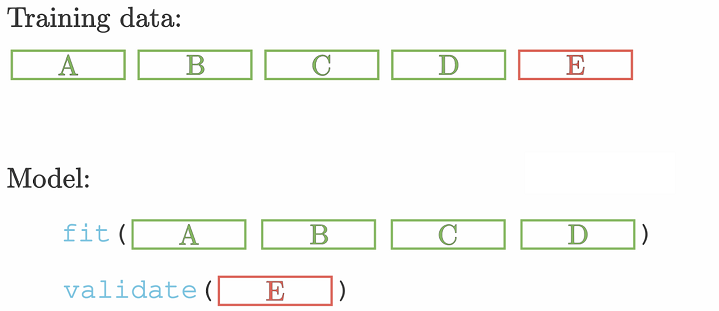

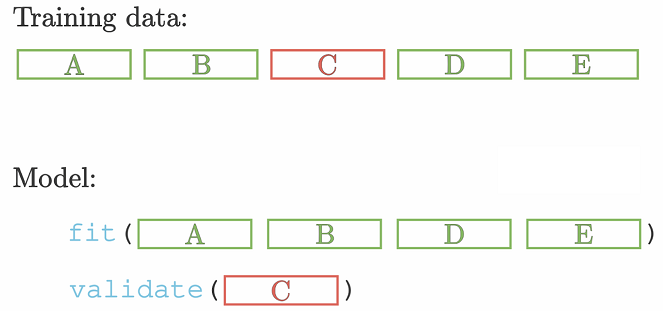

During cross-validation we can loop over different hyperparameters to find the optimal combination during several training runs.

**Preprocessing of training data**

Before training data is passed to the model, it is pre-processed. Typically by mormalizing and/or scaling it to contain values only between 0 and 1 or -1 and 1.

For an image that consists of numbers in the range between 0​ and 255​, we divide the whole dataset by 255​ and return data in the range from 0​ to 1​. Or we can also subtract 127.5​ (to get a range from -127.5​ to 127.5​) and divide by 127.5, returning data in the range from -1 to 1.

Additionally, in the case of low number of training data, we can augment it. For images, we can rotate, mirror or crop them to get more training data.

In [ ]:
# Validate the model

# Create test dataset
X_test, y_test = spiral_data(samples=100, classes=3)

# Perform a forward pass of our testing data through this layer
dense1.forward(X_test)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y_test)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)

if len(y_test.shape) == 2:
  y_test = np.argmax(y_test, axis=1)

accuracy = np.mean(predictions==y_test)
print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

validation, acc: 0.703, loss: 0.759


We can improve training by increasing the number of training samples (e.g. to 1000), increase the number of neurons in the first dense neuron layer (e.g. to 512)

**Model object: training, evaluation, and prediction**

In production, we don't want to only train a model, but also save their parameters as an artifact, load the model, and use it for prediction on new data.

In [ ]:
# package for creating synthetic data
%pip install nnfs

In [ ]:
# downloading the FashionMNIST data set
!wget https://nnfs.io/datasets/fashion_mnist_images.zip

# unzipping the archive
!7z x fashion_mnist_images.zip -ofashion_mnist_images

PATH = 'fashion_mnist_images'

--2022-03-13 14:14:20--  https://nnfs.io/datasets/fashion_mnist_images.zip
Resolving nnfs.io (nnfs.io)... 198.199.76.64
Connecting to nnfs.io (nnfs.io)|198.199.76.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45209499 (43M) [application/zip]
Saving to: ‘fashion_mnist_images.zip’

fashion_mnist_image 100%[===================>]  43.11M  66.0MB/s    in 0.7s    

2022-03-13 14:14:21 (66.0 MB/s) - ‘fashion_mnist_images.zip’ saved [45209499/45209499]


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 45209499 bytes (44 MiB)

Extracting archive: fashion_mnist_images.zip
  5% 4096 Open              --
Path = fashion_mnist_images.zip
Type = zip
Physical Size = 45209499
64-bit = +

  0%      1% 1345 

['7', '8', '5', '0', '1', '9', '2', '4', '3', '6']
['1351.png', '3893.png', '1246.png', '2173.png', '0307.png', '4743.png', '3985.png', '5438.png', '1199.png', '3519.png']
6000
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  

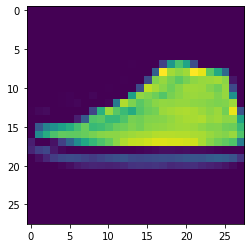

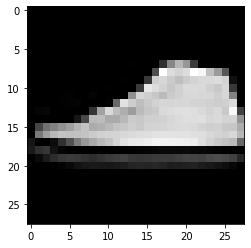

In [ ]:
# take a look at the FashionMNIST data set
import os
import cv2
import matplotlib.pyplot as plt

labels = os.listdir(os.path.join(PATH, 'train'))
print(labels)

files = os.listdir(os.path.join(PATH, 'train', '0'))
print(files[:10])
print(len(files))

# there are 10 classes in total, with each having 6k examples (balanced data set)

# potential solutions for unbalanced data set, and a biased model, we can trim
# over-represented classes or augment the under-represented classes

image_data = cv2.imread(os.path.join(PATH, 'train', '7/0002.png'), cv2.IMREAD_UNCHANGED)
print(image_data)

plt.imshow(image_data)
plt.show()

plt.imshow(image_data, cmap='gray')
plt.show()


In [ ]:
# whole model in OOP code

import numpy as np
import nnfs
import os
import cv2
import pickle
import copy

nnfs.init()

# Dense layer
class Layer_Dense:
  
  # Layer initialization
  def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l2=0,
                 bias_regularizer_l2=0):
    # Initialize weights and biases
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))
    # Set regularization strength
    self.weight_regularizer_l2 = weight_regularizer_l2
    self.bias_regularizer_l2 = bias_regularizer_l2
    
  # Forward pass
  def forward(self, inputs, training):
    # Remember input values
    self.inputs = inputs
    # Calculate output values from inputs, weights and biases
    self.output = np.dot(inputs, self.weights) + self.biases
  
  # Backward pass
  def backward(self, dvalues):
    # Gradients on parameters
    self.dweights = np.dot(self.inputs.T, dvalues)
    self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
    
    # Gradients on regularization
    # L2 on weights
    if self.weight_regularizer_l2 > 0:
      self.dweights += 2 * self.weight_regularizer_l2 * self.weights
    # L2 on biases
    if self.bias_regularizer_l2 > 0:
      self.dbiases += 2 * self.bias_regularizer_l2 * self.biases
    # Gradient on values
    self.dinputs = np.dot(dvalues, self.weights.T)
    
  # Retrieve layer parameters
  def get_parameters(self):
    return self.weights, self.biases
    
  # Set weights and biases in a layer instance
  def set_parameters(self, weights, biases):
    self.weights = weights
    self.biases = biases

# Dropout
class Layer_Dropout:
  # Init
  def __init__(self, rate):
    # Store rate, we invert it as for example for dropout
    # of 0.1 we need success rate of 0.9
    self.rate = 1 - rate
  
  # Forward pass
  def forward(self, inputs, training):
    # Save input values
    self.inputs = inputs
    # If not in the training mode - return values
    if not training:
      self.output = inputs.copy()
      return
    
    # Generate and save scaled mask
    self.binary_mask = np.random.binomial(1, self.rate,
                       size=inputs.shape) / self.rate
    # Apply mask to output values
    self.output = inputs * self.binary_mask
    
    # Backward pass
    def backward(self, dvalues):
      # Gradient on values
      self.dinputs = dvalues * self.binary_mask

# Input "layer"
class Layer_Input:
  
  # Forward pass
  def forward(self, inputs, training):
    self.output = inputs

# ReLU activation
class Activation_ReLU:
  
  # Forward pass
  def forward(self, inputs, training):
    # Remember input values
    self.inputs = inputs
    # Calculate output values from inputs
    self.output = np.maximum(0, inputs)
  
  # Backward pass
  def backward(self, dvalues):
    # Since we need to modify original variable, # let's make a copy of values first
    self.dinputs = dvalues.copy()
    
    # Zero gradient where input values were negative
    self.dinputs[self.inputs <= 0] = 0
  
  # Calculate predictions for outputs
  def predictions(self, outputs):
    return outputs

# Softmax activation
class Activation_Softmax:
  
  # Forward pass
  def forward(self, inputs, training):
    # Remember input values
    self.inputs = inputs
    # Get unnormalized probabilities
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

    # Normalize them for each sample
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

    self.output = probabilities
  
  # Backward pass
  def backward(self, dvalues):
    
    # Create uninitialized array
    self.dinputs = np.empty_like(dvalues)
    
    # Enumerate outputs and gradients
    for index, (single_output, single_dvalues) in \
            enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output and
            jacobian_matrix = np.diagflat(single_output) - \
                              np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,
                                         single_dvalues)

  # Calculate predictions for outputs
  def predictions(self, outputs):
    return np.argmax(outputs, axis=1)

class Optimizer_Adam:
  
  # Initialize optimizer - set settings
  def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
               beta_1=0.9, beta_2=0.999):
    self.learning_rate = learning_rate
    self.current_learning_rate = learning_rate
    self.decay = decay
    self.iterations = 0
    self.epsilon = epsilon
    self.beta_1 = beta_1
    self.beta_2 = beta_2

  # Call once before any parameter updates
  def pre_update_params(self):
    if self.decay:
      self.current_learning_rate = self.learning_rate * \
            (1. / (1. + self.decay * self.iterations))
  
  # Update parameters
  def update_params(self, layer):
    
    # If layer does not contain cache arrays,
    # create them filled with zeros
    if not hasattr(layer, 'weight_cache'):
      layer.weight_momentums = np.zeros_like(layer.weights)
      layer.weight_cache = np.zeros_like(layer.weights)
      layer.bias_momentums = np.zeros_like(layer.biases)
      layer.bias_cache = np.zeros_like(layer.biases)
  
    # Update momentum with current gradients
    layer.weight_momentums = self.beta_1 * \
                           layer.weight_momentums + \
                           (1 - self.beta_1) * layer.dweights
    layer.bias_momentums = self.beta_1 * \
                         layer.bias_momentums + \
                         (1 - self.beta_1) * layer.dbiases
  
    # Get corrected momentum
    # self.iteration is 0 at first pass
    # and we need to start with 1 here
    weight_momentums_corrected = layer.weight_momentums / \
      (1 - self.beta_1 ** (self.iterations + 1))
    bias_momentums_corrected = layer.bias_momentums / \
      (1 - self.beta_1 ** (self.iterations + 1))
    # Update cache with squared current gradients
    layer.weight_cache = self.beta_2 * layer.weight_cache + \
      (1 - self.beta_2) * layer.dweights**2
    layer.bias_cache = self.beta_2 * layer.bias_cache + \
      (1 - self.beta_2) * layer.dbiases**2
    # Get corrected cache
    weight_cache_corrected = layer.weight_cache / \
      (1 - self.beta_2 ** (self.iterations + 1))
    bias_cache_corrected = layer.bias_cache / \
      (1 - self.beta_2 ** (self.iterations + 1))

    # Vanilla SGD parameter update + normalization
    # with square rooted cache
    layer.weights += -self.current_learning_rate * \
                   weight_momentums_corrected / \
                   (np.sqrt(weight_cache_corrected) +
                   self.epsilon)
    layer.biases += -self.current_learning_rate * \
                  bias_momentums_corrected / \
                  (np.sqrt(bias_cache_corrected) +
                  self.epsilon)
  
  # Call once after any parameter updates
  def post_update_params(self):
    self.iterations += 1

# Common loss class
class Loss:
  
  # Regularization loss calculation
  def regularization_loss(self):
    
    # 0 by default
    regularization_loss = 0
    
    # Calculate regularization loss
    # iterate all trainable layers
    for layer in self.trainable_layers:
      
      # L2 regularization - weights
      if layer.weight_regularizer_l2 > 0:
        regularization_loss += layer.weight_regularizer_l2 * \
                               np.sum(layer.weights * \
                                      layer.weights)

      # L2 regularization - biases
      if layer.bias_regularizer_l2 > 0:
        regularization_loss += layer.bias_regularizer_l2 * \
                               np.sum(layer.biases * \
                                      layer.biases)
    return regularization_loss
    
  # Set/remember trainable layers
  def remember_trainable_layers(self, trainable_layers):
    self.trainable_layers = trainable_layers
  
  # Calculates the data and regularization losses
  # given model output and ground truth values
  def calculate(self, output, y, *, include_regularization=False):
    
    # Calculate sample losses
    sample_losses = self.forward(output, y)
    
    # Calculate mean loss
    data_loss = np.mean(sample_losses)
    
    # Add accumulated sum of losses and sample count
    self.accumulated_sum += np.sum(sample_losses)
    self.accumulated_count += len(sample_losses)
    
    # If just data loss - return it
    if not include_regularization:
      return data_loss
    
    # Return the data and regularization losses
    return data_loss, self.regularization_loss()
  
  # Calculates accumulated loss
  def calculate_accumulated(self, *, include_regularization=False):
    
    # Calculate mean loss
    data_loss = self.accumulated_sum / self.accumulated_count
    
    # If just data loss - return it
    if not include_regularization:
      return data_loss
    
    # Return the data and regularization losses
    return data_loss, self.regularization_loss()
  
  # Reset variables for accumulated loss
  def new_pass(self):
    self.accumulated_sum = 0
    self.accumulated_count = 0

# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
  
  # Forward pass
  def forward(self, y_pred, y_true):
    # Number of samples in a batch
    samples = len(y_pred)
  
    # Clip data to prevent division by 0
    # Clip both sides to not drag mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
  
    # Probabilities for target values -
    # only if categorical labels
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[
          range(samples),
          y_true
      ]
  
    # Mask values - only for one-hot encoded labels
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum( y_pred_clipped * y_true, axis=1)

    # Losses
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods
    
  # Backward pass
  def backward(self, dvalues, y_true):
    
    # Number of samples
    samples = len(dvalues)
    # Number of labels in every sample
    # We'll use the first sample to count them
    labels = len(dvalues[0])

    # If labels are sparse, turn them into one-hot vector
    if len(y_true.shape) == 1:
      y_true = np.eye(labels)[y_true]
      
    # Calculate gradient
    self.dinputs = -y_true / dvalues
    # Normalize gradient
    self.dinputs = self.dinputs / samples

# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():
  
  # Backward pass
  def backward(self, dvalues, y_true):
    
    # Number of samples
    samples = len(dvalues)
    
    # If labels are one-hot encoded,
    # turn them into discrete values
    if len(y_true.shape) == 2:
      y_true = np.argmax(y_true, axis=1)

    # Copy so we can safely modify
    self.dinputs = dvalues.copy()
    # Calculate gradient
    self.dinputs[range(samples), y_true] -= 1
    # Normalize gradient
    self.dinputs = self.dinputs / samples
  

# Common accuracy class
class Accuracy:

  # Calculates an accuracy
  # given predictions and ground truth values
  def calculate(self, predictions, y):
    # Get comparison results
    comparisons = self.compare(predictions, y)
    
    # Calculate an accuracy
    accuracy = np.mean(comparisons)
    
    # Add accumulated sum of matching values and sample count
    self.accumulated_sum += np.sum(comparisons)
    self.accumulated_count += len(comparisons)
    
    # Return accuracy
    return accuracy
  
  # Calculates accumulated accuracy
  def calculate_accumulated(self):
    # Calculate an accuracy
    accuracy = self.accumulated_sum / self.accumulated_count
  
    # Return the data and regularization losses
    return accuracy
  
  # Reset variables for accumulated accuracy
  def new_pass(self):
    self.accumulated_sum = 0
    self.accumulated_count = 0

# Accuracy calculation for classification model
class Accuracy_Categorical(Accuracy):
  
  # No initialization is needed
  def init(self, y):
    pass

  # Compares predictions to the ground truth values
  def compare(self, predictions, y):
    if len(y.shape) == 2:
      y = np.argmax(y, axis=1)
    return predictions == y


# Model class
class Model:
  
  def __init__(self):
    # Create a list of network objects
    self.layers = []
    # Softmax classifier's output object
    self.softmax_classifier_output = None
    # Add objects to the model
  def add(self, layer):
    self.layers.append(layer)
  
  # Set loss, optimizer and accuracy
  def set(self, *, loss=None, optimizer=None, accuracy=None):
    if loss is not None:
      self.loss = loss
    if optimizer is not None:
      self.optimizer = optimizer
    if accuracy is not None:
      self.accuracy = accuracy
  
  # Finalize the model
  def finalize(self):
    
    # Create and set the input layer
    self.input_layer = Layer_Input()
    
    # Count all the objects
    layer_count = len(self.layers)
    
    # Initialize a list containing trainable layers:
    self.trainable_layers = []

    # Iterate the objects
    for i in range(layer_count):
      
      # If it's the first layer
      # the previous layer object is the input layer
      if i == 0:
        self.layers[i].prev = self.input_layer
        self.layers[i].next = self.layers[i+1]
        
      # All layers except for the first and the last
      elif i < layer_count - 1:
        self.layers[i].prev = self.layers[i-1]
        self.layers[i].next = self.layers[i+1]
 
      # The last layer - the next object is the loss
      # Also let's save aside the reference to the last object
      # whose output is the model's output
      else:
        self.layers[i].prev = self.layers[i-1]
        self.layers[i].next = self.loss
        self.output_layer_activation = self.layers[i]
        
      # If layer contains an attribute called "weights",
      # it's a trainable layer -
      # add it to the list of trainable layers
      # We don't need to check for biases -
      # checking for weights is enough
      if hasattr(self.layers[i], 'weights'):
        self.trainable_layers.append(self.layers[i])
         
      # Update loss object with trainable layers
      if self.loss is not None:
        self.loss.remember_trainable_layers(
                  self.trainable_layers
      )
        
    # If output activation is Softmax and
    # loss function is Categorical Cross-Entropy
    # create an object of combined activation
    # and loss function containing
    # faster gradient calculation
    if isinstance(self.layers[-1], Activation_Softmax) and \
      isinstance(self.loss, Loss_CategoricalCrossentropy):
      
      # Create an object of combined activation
      # and loss functions
      self.softmax_classifier_output = \
        Activation_Softmax_Loss_CategoricalCrossentropy()

  # Train the model
  def train(self, X, y, *, epochs=1, batch_size=None,
              print_every=1, validation_data=None):
    
    # Initialize accuracy object
    self.accuracy.init(y)
    
    # Default value if batch size is not being set
    train_steps = 1
    
    # Calculate number of steps
    if batch_size is not None:
      train_steps = len(X) // batch_size
      
      # Dividing rounds down. If there are some remaining
      # data but not a full batch, this won't include it
      # Add `1` to include this not full batch
      if train_steps * batch_size < len(X):
       train_steps += 1
    
    # Main training loop
    for epoch in range(1, epochs+1):
      
      # Print epoch number
      print(f'​ epoch: ​{epoch}​')
      
      # Reset accumulated values in loss and accuracy objects
      self.loss.new_pass()
      self.accuracy.new_pass()
      
      # Iterate over steps
      for step in range(train_steps):
        # If batch size is not set -
        # train using one step and full dataset
        if batch_size is None:
          batch_X = X
          batch_y = y
        
        # Otherwise slice a batch
        else:
          batch_X = X[step*batch_size:(step+1)*batch_size]
          batch_y = y[step*batch_size:(step+1)*batch_size]
        
        # Perform the forward pass
        output = self.forward(batch_X, training=True)
        
        # Calculate loss
        data_loss, regularization_loss = \
            self.loss.calculate(output, batch_y, include_regularization=True)
        loss = data_loss + regularization_loss

        # Get predictions and calculate an accuracy
        predictions = self.output_layer_activation.predictions(output)
        accuracy = self.accuracy.calculate(predictions, batch_y)
        
        # Perform backward pass
        self.backward(output, batch_y)

        # Optimize (update parameters)
        self.optimizer.pre_update_params()
        for layer in self.trainable_layers:
          self.optimizer.update_params(layer)
          self.optimizer.post_update_params()
        
        # Print a summary
        if not step % print_every or step == train_steps - 1:
          print(f'step: {step}, ' +
                f'acc: {accuracy:.3f}, ' +
                f'loss: {loss:.3f} (' +
                f'data_loss: {data_loss:.3f},​ ' +
                f'reg_loss: {regularization_loss:.3f}), ' +
                f'lr: {self.optimizer.current_learning_rate}')
      
      # Get and print epoch loss and accuracy
      epoch_data_loss, epoch_regularization_loss = \
        self.loss.calculate_accumulated(include_regularization=True)
      epoch_loss = epoch_data_loss + epoch_regularization_loss
      epoch_accuracy = self.accuracy.calculate_accumulated()

      print(f'training, ' +
            f'acc: {epoch_accuracy:.3f}, ' +
            f'loss: {epoch_loss:.3f} (' +
            f'data_loss: {epoch_data_loss:.3f}, ' +
            f'reg_loss: {epoch_regularization_loss:.3f}), ' +
            f'lr: {self.optimizer.current_learning_rate}')

      # If there is the validation data
      if validation_data is not None:
        # Evaluate the model:
        self.evaluate(*validation_data, batch_size=batch_size)
  
  # Evaluates the model using passed in dataset
  def evaluate(self, X_val, y_val, *, batch_size=None):
    
    # Default value if batch size is not being set
    validation_steps = 1
    
    # Calculate number of steps
    if batch_size is not None:
      validation_steps = len(X_val) // batch_size
      
      # Dividing rounds down. If there are some remaining
      # data but not a full batch, this won't include it
      # Add `1` to include this not full batch
      if validation_steps*batch_size < len(X_val):
        validation_steps += 1
      
    # Reset accumulated values in loss
    # and accuracy objects
    self.loss.new_pass()
    self.accuracy.new_pass() 

    # Iterate over steps
    for step in range(validation_steps):
      
      # If batch size is not set -
      # train using one step and full dataset
      if batch_size is None:
        batch_X = X_val
        batch_y = y_val

      # Otherwise slice a batch
      else:
        batch_X = X_val[step*batch_size:(step+1)*batch_size]
        batch_y = y_val[step*batch_size:(step+1)*batch_size]
        
      # Perform the forward pass
      output = self.forward(batch_X, training=False)
        
      # Calculate the loss 
      self.loss.calculate(output, batch_y)
        
      # Get predictions and calculate an accuracy
      predictions = self.output_layer_activation.predictions(output)
      self.accuracy.calculate(predictions, batch_y)
     
    # Get and print validation loss and accuracy
    validation_loss = self.loss.calculate_accumulated()
    validation_accuracy = self.accuracy.calculate_accumulated()
  
    # Print a summary
    print(f'validation, ' +
          f'acc: {validation_accuracy:.3f}, ' +
          f'loss: {validation_loss:.3f}')

  # Predicts on the samples
  def predict(self, X, *, batch_size=None):
    
    # Default value if batch size is not being set
    prediction_steps = 1
    
    # Calculate number of steps
    if batch_size is not None:
      prediction_steps = len(X) // batch_size
    
      # Dividing rounds down. If there are some remaining
      # data but not a full batch, this won't include it
      # Add `1` to include this not full batch
      if prediction_steps * batch_size < len(X):
        prediction_steps += 1
        
    # Model outputs
    output = []
    
    # Iterate over steps
    for step in range(prediction_steps):
      
      # If batch size is not set -
      # train using one step and full dataset
      if batch_size is None:
        batch_X = X
      
      # Otherwise slice a batch
      else:
          batch_X = X[step*batch_size:(step+1)*batch_size]
      
      # Perform the forward pass
      batch_output = self.forward(batch_X, training=False)
      
      # Append batch prediction to the list of predictions
      output.append(batch_output)
      
      # Stack and return results
      return np.vstack(output)
  
  # Performs forward pass
  def forward(self, X, training):
    
    # Call forward method on the input layer
    # this will set the output property that
    # the first layer in "prev" object is expecting 
    self.input_layer.forward(X, training)
    
    # Call forward method of every object in a chain
    # Pass output of the previous object as a parameter
    for layer in self.layers:
        layer.forward(layer.prev.output, training)
    
    # "layer" is now the last object from the list,
    # return its output
    return layer.output

  # Performs backward pass
  def backward(self, output, y):
    
    # If softmax classifier
    if self.softmax_classifier_output is not None:
      # First call backward method
      # on the combined activation/loss
      # this will set dinputs property
      self.softmax_classifier_output.backward(output, y)
      
      # Since we'll not call backward method of the last layer
      # which is Softmax activation
      # as we used combined activation/loss
      # object, let's set dinputs in this object
      self.layers[-1].dinputs = \
            self.softmax_classifier_output.dinputs
      
      # Call backward method going through
      # all the objects but last
      # in reversed order passing dinputs as a parameter
      for layer in reversed(self.layers[:-1]):
            layer.backward(layer.next.dinputs)
      return

    # First call backward method on the loss
    # this will set dinputs property that the last
    # layer will try to access shortly
    self.loss.backward(output, y)
    
    # Call backward method going through all the objects
    # in reversed order passing dinputs as a parameter
    for layer in reversed(self.layers):
        layer.backward(layer.next.dinputs)
  
  # Retrieves and returns parameters of trainable layers
  def get_parameters(self):
    
    # Create a list for parameters
    parameters = []
    
    # Iterable trainable layers and get their parameters
    for layer in self.trainable_layers:
        parameters.append(layer.get_parameters())
    
    # Return a list
    return parameters

  # Updates the model with new parameters
  def set_parameters(self, parameters):
    
    # Iterate over the parameters and layers
    # and update each layers with each set of the parameters
    for parameter_set, layer in zip(parameters, self.trainable_layers):
      layer.set_parameters(*parameter_set)
    
  # Saves the parameters to a file
  def save_parameters(self, path):
    # Open a file in the binary-write mode
    # and save parameters into it
    with open(path, 'wb') as f:
        pickle.dump(self.get_parameters(), f)
  
  # Loads the weights and updates a model instance with them
  def load_parameters(self, path):
    
    # Open file in the binary-read mode,
    # load weights and update trainable layers
    with open(path, 'rb') as f:
        self.set_parameters(pickle.load(f))

  # Saves the model
  def save(self, path):
    
    # Make a deep copy of current model instance
    model = copy.deepcopy(self)
    
    # Reset accumulated values in loss and accuracy objects
    model.loss.new_pass()
    model.accuracy.new_pass()
    
    # Remove data from the input layer
    # and gradients from the loss object
    model.input_layer.__dict__.pop('output', None)
    model.loss.__dict__.pop('dinputs', None)
    
    # For each layer remove inputs, output and dinputs properties 
    for layer in model.layers:
      for property in ['inputs', 'output', 'dinputs', 'dweights', 'dbiases']:
        layer.__dict__.pop(property, None)
    
    # Open a file in the binary-write mode and save the model
    with open(path, 'wb') as f:
      pickle.dump(model, f)

  # Loads and returns a model
  @staticmethod
  def load(path):
    
    # Open file in the binary-read mode, load a model
    with open(path, 'rb') as f:
      model = pickle.load(f)
    
    # Return a model
    return model

# Loads a MNIST dataset
def load_mnist_dataset(dataset, path):
  
  # Scan all the directories and create a list of labels
  labels = os.listdir(os.path.join(path, dataset))
  
  # Create lists for samples and labels
  X = []
  y = []
  
  # For each label folder
  for label in labels:
    
    # And for each image in given folder
    for file in os.listdir(os.path.join(path, dataset, label)):
      # Read the image
      image = cv2.imread(os.path.join(path, dataset, label, file),
                        cv2.IMREAD_UNCHANGED)
      # And append it and a label to the lists
      X.append(image)
      y.append(label)
  
  # Convert the data to proper numpy arrays and return
  return np.array(X), np.array(y).astype('uint8')

# MNIST dataset (train + test)
def create_data_mnist(path):
  
  # Load both sets separately
  X, y = load_mnist_dataset('train', path)
  X_test, y_test = load_mnist_dataset('test', path)
  
  # And return all the data
  return X, y, X_test, y_test

In [ ]:
# MODEL TRAINING
PATH = 'fashion_mnist_images'

# Create dataset
X, y, X_test, y_test = create_data_mnist(PATH)

# Shuffle the training dataset

keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

# Scale and reshape samples
X = (X.reshape(X.shape[0], -1).astype(np.float32) - 127.5) / 127.5
X_test = (X_test.reshape(X_test.shape[0], -1).astype(np.float32) - 127.5) / 127.5

# Instantiate the model
model = Model()

# Add layers
model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())

# Set loss, optimizer and accuracy objects
model.set(loss=Loss_CategoricalCrossentropy(), optimizer=Optimizer_Adam(decay=1e-4), accuracy=Accuracy_Categorical())

# Finalize the model
model.finalize()

# Train the model
model.train(X, y, validation_data=(X_test, y_test), epochs=10, batch_size=128, print_every=100)

# Retrieve and print parameters
parameters = model.get_parameters()
print(parameters)

In [ ]:
# MODEL EVALUATION AND SAVING
model.evaluate(X_test, y_test)
model.save('fashion_mnist.model')

In [ ]:
# MODEL PREDICTION

# Label index to label name relation
fashion_mnist_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot' }

# Read an image for testing
#image_data = cv2.imread('pants.png', cv2.IMREAD_GRAYSCALE)
image_data = cv2.imread(os.path.join(PATH, 'train', '9/0002.png'), cv2.IMREAD_GRAYSCALE)

# Resize to the same size as Fashion MNIST images
image_data = cv2.resize(image_data, (28, 28))

# Invert image colors
image_data = 255 - image_data

# Reshape and scale pixel data
image_data = (image_data.reshape(1, -1).astype(np.float32) - 127.5) / 127.5

# Load the model
model = Model.load('fashion_mnist.model')

# Predict on the image
confidences = model.predict(image_data)

# Get prediction instead of confidence levels
predictions = model.output_layer_activation.predictions(confidences)

# Get label name from label index
prediction = fashion_mnist_labels[predictions[0]]

print(prediction)

T-shirt/top


**Summary: network's implementation**

Structure:
  - we define an input layer class corresponding to the size of the training examples
  - we define dense layer class where we are able to define the number of parameters (weights, biases) and neurons
  - for each layer object we have a forward and a backward method to implement data flow
  - we define the activation fuction (ReLU) class with a forward and a backward method to implement data flow
  - we define the Softmax activation class for the final prediction which includes a forward and a backward method
  - we define an optimizer class with hyperparameters such as learning_rate, learning_rate decay, and momentum and methods to update the parameters (weights, biases)
  - we define a cross-entropy loss function class to calculate network's training and regularization loss
  - we define an accuracy class to calculate network's accuracy after each training step

Data flow:
  - define a train method for the model class including epoch numbers and batch_size
  - define an evaluation method for the model to test its generalization
  - define a predict method for the model to test its prediction for specific sample
  - define a save method for the model to pikle it